# Imports

In [2]:
import pandas as pd
import copy
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import datetime

#Math and Stats
import numpy as np
from scipy import stats

from kmodes.kmodes import KModes
from sklearn.cluster import KMeans

from Modules.kprototypes import KPrototypes

#Evaluations
from sklearn.metrics import silhouette_samples, silhouette_score

#Saving and Exporting
import pickle

# Import module for data visualization
from plotnine import *
import plotnine
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import matplotlib.image as mpimg

import plotly.graph_objects as go

# Feature Selection (Initial Feature Selections/Engineering)

In [5]:
df = pd.read_csv("Data/Crime_data/covid_crime.csv")
df

ARREST_DATE  WeekDay  Month  Crime Severity  AGE_GROUP  PERP_SEX  \
0       2020-03-01        6      3               2          0         1   
1       2020-03-01        6      3               0          2         1   
2       2020-03-01        6      3               2          1         1   
3       2020-03-01        6      3               2          2         0   
4       2020-03-01        6      3               0          1         1   
...            ...      ...    ...             ...        ...       ...   
122868  2021-02-28        6      2               2          2         1   
122869  2021-02-28        6      2               1          0         1   
122870  2021-02-28        6      2               0          1         1   
122871  2021-02-28        6      2               2          1         1   
122872  2021-02-28        6      2               0          1         1   

         Latitude  Longitude                       New Georeferenced Column  \
0       40.647951 -73.960606   POINT (-73.96060645599994 40.64795139700004)   
1       40.645023 -74.077217       POINT (-74.077216847 40.645022746000045)   
2       40.829510 -73.888056  POINT (-73.88805604799995 40.829510293000055)   
3       40.672574 -73.910176   POINT (-73.91017639799998 40.67257395100007)   
4       40.677514 -73.789838   POINT (-73.78983757299993 40.67751412800004)   
...           ...        ...                                            ...   
122868  40.736698 -73.983316  POINT (-73.98331602599995 40.736698070000045)   
122869  40.836950 -73.927117  POINT (-73.92711678499995 40.836949576000045)   
122870  40.753875 -73.984820   POINT (-73.98482043999996 40.75387492400005)   
122871  40.823387 -73.870170         POINT (-73.87017045 40.82338729100008)   
122872  40.715671 -73.983942   POINT (-73.98394174399994 40.71567057300007)   

        ARREST_BORO_Brooklyn  ARREST_BORO_Manhatten  ARREST_BORO_Queens  \
0                          1                      0                   0   
1                          0                      0                   0   
2                          0                      0                   0   
3                          1                      0                   0   
4                          0                      0                   1   
...                      ...                    ...                 ...   
122868                     0                      1                   0   
122869                     0                      0                   0   
122870                     0                      1                   0   
122871                     0                      0                   0   
122872                     0                      1                   0   

        ARREST_BORO_Staten Island  PERP_RACE_ASIAN / PACIFIC ISLANDER  \
0                               0                                   0   
1                               1                                   0   
2                               0                                   0   
3                               0                                   0   
4                               0                                   0   
...                           ...                                 ...   
122868                          0                                   1   
122869                          0                                   0   
122870                          0                                   0   
122871                          0                                   0   
122872                          0                                   0   

        PERP_RACE_BLACK  PERP_RACE_BLACK HISPANIC  PERP_RACE_WHITE  \
0                     1                         0                0   
1                     0                         0                0   
2                     1                         0                0   
3                     1                         0                0   
4                     1      

In [6]:
#Adding COVID_WAVE column
df['COVID_WAVE'] = pd.read_csv("Data/Covid_data/covid_wave.csv")
df

ARREST_DATE  WeekDay  Month  Crime Severity  AGE_GROUP  PERP_SEX  \
0       2020-03-01        6      3               2          0         1   
1       2020-03-01        6      3               0          2         1   
2       2020-03-01        6      3               2          1         1   
3       2020-03-01        6      3               2          2         0   
4       2020-03-01        6      3               0          1         1   
...            ...      ...    ...             ...        ...       ...   
122868  2021-02-28        6      2               2          2         1   
122869  2021-02-28        6      2               1          0         1   
122870  2021-02-28        6      2               0          1         1   
122871  2021-02-28        6      2               2          1         1   
122872  2021-02-28        6      2               0          1         1   

         Latitude  Longitude                       New Georeferenced Column  \
0       40.647951 -73.960606   POINT (-73.96060645599994 40.64795139700004)   
1       40.645023 -74.077217       POINT (-74.077216847 40.645022746000045)   
2       40.829510 -73.888056  POINT (-73.88805604799995 40.829510293000055)   
3       40.672574 -73.910176   POINT (-73.91017639799998 40.67257395100007)   
4       40.677514 -73.789838   POINT (-73.78983757299993 40.67751412800004)   
...           ...        ...                                            ...   
122868  40.736698 -73.983316  POINT (-73.98331602599995 40.736698070000045)   
122869  40.836950 -73.927117  POINT (-73.92711678499995 40.836949576000045)   
122870  40.753875 -73.984820   POINT (-73.98482043999996 40.75387492400005)   
122871  40.823387 -73.870170         POINT (-73.87017045 40.82338729100008)   
122872  40.715671 -73.983942   POINT (-73.98394174399994 40.71567057300007)   

        ARREST_BORO_Brooklyn  ARREST_BORO_Manhatten  ARREST_BORO_Queens  \
0                          1                      0                   0   
1                          0                      0                   0   
2                          0                      0                   0   
3                          1                      0                   0   
4                          0                      0                   1   
...                      ...                    ...                 ...   
122868                     0                      1                   0   
122869                     0                      0                   0   
122870                     0                      1                   0   
122871                     0                      0                   0   
122872                     0                      1                   0   

        ARREST_BORO_Staten Island  PERP_RACE_ASIAN / PACIFIC ISLANDER  \
0                               0                                   0   
1                               1                                   0   
2                               0                                   0   
3                               0                                   0   
4                               0                                   0   
...                           ...                                 ...   
122868                          0                                   1   
122869                          0                                   0   
122870                          0                                   0   
122871                          0                                   0   
122872                          0                                   0   

        PERP_RACE_BLACK  PERP_RACE_BLACK HISPANIC  PERP_RACE_WHITE  \
0                     1                         0                0   
1                     0                         0                0   
2                     1                         0                0   
3                     1                         0                0   
4                     1      

In [ ]:
#deepcopy the dataframe
df_kmodes = copy.deepcopy(df)

#drop spatial data (spatial data isnt categorical... boroughs are sufficient in this case)
df_kmodes = df_kmodes.drop(columns=['Latitude', 'Longitude', 'New Georeferenced Column'])

#convert the date strings to datetime objects (to be able to scale)
df_kmodes['ARREST_DATE'] = df_kmodes['ARREST_DATE'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d"))


#convert the datetime objects to timestamps (to be able to scale)
df_kmodes['ARREST_DATE'] = df_kmodes['ARREST_DATE'].apply(lambda x: datetime.datetime.timestamp(x))

df_kmodes

ARREST_DATE  WeekDay  Month  Crime Severity  AGE_GROUP  PERP_SEX  \
0       1.583039e+09        6      3               2          0         1   
1       1.583039e+09        6      3               0          2         1   
2       1.583039e+09        6      3               2          1         1   
3       1.583039e+09        6      3               2          2         0   
4       1.583039e+09        6      3               0          1         1   
...              ...      ...    ...             ...        ...       ...   
122868  1.614488e+09        6      2               2          2         1   
122869  1.614488e+09        6      2               1          0         1   
122870  1.614488e+09        6      2               0          1         1   
122871  1.614488e+09        6      2               2          1         1   
122872  1.614488e+09        6      2               0          1         1   

        ARREST_BORO_Brooklyn  ARREST_BORO_Manhatten  ARREST_BORO_Queens  \
0                          1                      0                   0   
1                          0                      0                   0   
2                          0                      0                   0   
3                          1                      0                   0   
4                          0                      0                   1   
...                      ...                    ...                 ...   
122868                     0                      1                   0   
122869                     0                      0                   0   
122870                     0                      1                   0   
122871                     0                      0                   0   
122872                     0                      1                   0   

        ARREST_BORO_Staten Island  PERP_RACE_ASIAN / PACIFIC ISLANDER  \
0                               0                                   0   
1                               1                                   0   
2                               0                                   0   
3                               0                                   0   
4                               0                                   0   
...                           ...                                 ...   
122868                          0                                   1   
122869                          0                                   0   
122870                          0                                   0   
122871                          0                                   0   
122872                          0                                   0   

        PERP_RACE_BLACK  PERP_RACE_BLACK HISPANIC  PERP_RACE_WHITE  \
0                     1                         0                0   
1                     0                         0                0   
2                     1                         0                0   
3                     1                         0                0   
4                     1                         0                0   
...                 ...                       ...              ...   
122868                0                         0                0   
122869                1                         0                0   
122870                1                         0                0   
122871                0                         1                0   
122872                0                         0                0   

        PERP_RACE_WHITE HISPANIC  COVID_WAVE  
0                              0           0  
1                              1           0  
2                              0           0  
3                              0           0  
4                              0           0  
...                          ...         ...  
122868                         0           1  
122869                         0           1  
122870                         0          

# First Initial Clusters (without dimensionality reductions)

## K-Mode Clustering (without dimension reduction) 
#### Note: K-mode is my first choice because we are dealing mainly on categorical features. 

In [ ]:
#Scaling/Normalizing the dataframe for the kmode
#scaler = MinMaxScaler()
scaler = StandardScaler()
df_kmodes_scaled=scaler.fit_transform(df_kmodes)
df_kmodes_scaled = pd.DataFrame(df_kmodes_scaled, columns = df_kmodes.columns)
df_kmodes_scaled

ARREST_DATE   WeekDay     Month  Crime Severity  AGE_GROUP  PERP_SEX  \
0         -1.733220  1.680452 -0.959043        1.226543  -1.536391  0.449311   
1         -1.733220  1.680452 -0.959043       -1.213022   1.569811  0.449311   
2         -1.733220  1.680452 -0.959043        1.226543   0.016710  0.449311   
3         -1.733220  1.680452 -0.959043        1.226543   1.569811 -2.225632   
4         -1.733220  1.680452 -0.959043       -1.213022   0.016710  0.449311   
...             ...       ...       ...             ...        ...       ...   
122868     1.615056  1.680452 -1.236167        1.226543   1.569811  0.449311   
122869     1.615056  1.680452 -1.236167        0.006760  -1.536391  0.449311   
122870     1.615056  1.680452 -1.236167       -1.213022   0.016710  0.449311   
122871     1.615056  1.680452 -1.236167        1.226543   0.016710  0.449311   
122872     1.615056  1.680452 -1.236167       -1.213022   0.016710  0.449311   

        ARREST_BORO_Brooklyn  ARREST_BORO_Manhatten  ARREST_BORO_Queens  \
0                   1.625980              -0.548133           -0.526258   
1                  -0.615014              -0.548133           -0.526258   
2                  -0.615014              -0.548133           -0.526258   
3                   1.625980              -0.548133           -0.526258   
4                  -0.615014              -0.548133            1.900208   
...                      ...                    ...                 ...   
122868             -0.615014               1.824375           -0.526258   
122869             -0.615014              -0.548133           -0.526258   
122870             -0.615014               1.824375           -0.526258   
122871             -0.615014              -0.548133           -0.526258   
122872             -0.615014               1.824375           -0.526258   

        ARREST_BORO_Staten Island  PERP_RACE_ASIAN / PACIFIC ISLANDER  \
0                       -0.217785                           -0.237295   
1                        4.591685                           -0.237295   
2                       -0.217785                           -0.237295   
3                       -0.217785                           -0.237295   
4                       -0.217785                           -0.237295   
...                           ...                                 ...   
122868                  -0.217785                            4.214171   
122869                  -0.217785                           -0.237295   
122870                  -0.217785                           -0.237295   
122871                  -0.217785                           -0.237295   
122872                  -0.217785                           -0.237295   

        PERP_RACE_BLACK  PERP_RACE_BLACK HISPANIC  PERP_RACE_WHITE  \
0              1.013677                 -0.307060        -0.359057   
1             -0.986508                 -0.307060        -0.359057   
2              1.013677                 -0.307060        -0.359057   
3              1.013677                 -0.307060        -0.359057   
4              1.013677                 -0.307060        -0.359057   
...                 ...                       ...              ...   
122868        -0.986508                 -0.307060        -0.359057   
122869         1.013677                 -0.307060        -0.359057   
122870         1.013677                 -0.307060        -0.359057   
122871        -0.986508                  3.256689        -0.359057   
122872        -0.986508                 -0.307060        -0.359057   

        PERP_RACE_WHITE HISPANIC  COVID_WAVE  
0                      -0.577886   -1.168035  
1                       1.730445   -1.168035  
2                      -0.577886   -1.168035  
3                      -0.577886   -1.168035  
4                      -0.577886   -1.168035  
...                          ...         ...  
122868                 -0.577886    0.856139  
122869                 -0.577886    0.856139  
12287

In [ ]:
#Convert dtatarame to Matrix (note: kmodes module process the matrix for calculation) (true?)
df_kmodes_scaled_Matrix = df_kmodes_scaled.to_numpy()
df_kmodes_scaled_Matrix

array([[-1.73322017,  1.68045246, -0.95904336, ..., -0.35905711,
        -0.57788593, -1.16803524],
       [-1.73322017,  1.68045246, -0.95904336, ..., -0.35905711,
         1.73044532, -1.16803524],
       [-1.73322017,  1.68045246, -0.95904336, ..., -0.35905711,
        -0.57788593, -1.16803524],
       ...,
       [ 1.61505566,  1.68045246, -1.23616719, ..., -0.35905711,
        -0.57788593,  0.85613855],
       [ 1.61505566,  1.68045246, -1.23616719, ..., -0.35905711,
        -0.57788593,  0.85613855],
       [ 1.61505566,  1.68045246, -1.23616719, ..., -0.35905711,
         1.73044532,  0.85613855]])

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 755413.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 755413.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 755413.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 755413.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 755413.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 45947, cost: 688344.0
Run 1, iteration: 2/100, moves: 1577, cost: 688102.0
Run 1, iteration: 3/100, moves: 113, cost: 688102.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, it

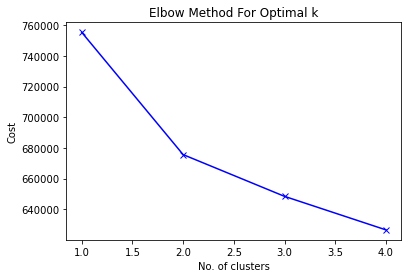

In [8]:
# Elbow curve to find optimal K
cost = []
K = range(1,5)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(df_kmodes_scaled_Matrix)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

#### Note: k = 2 seems like the right elbow rule...

In [9]:
# Building the model with 2 clusters
kmode = KModes(n_clusters=2, init = "random", n_init = 5, verbose=1)
clusters_kmode = kmode.fit_predict(df_kmodes_scaled)
clusters_kmode

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 17674, cost: 707349.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 42688, cost: 677439.0
Run 2, iteration: 2/100, moves: 16563, cost: 677439.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 25901, cost: 687971.0
Run 3, iteration: 2/100, moves: 463, cost: 687971.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 24025, cost: 684384.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 22973, cost: 693756.0
Run 5, iteration: 2/100, moves: 1911, cost: 693730.0
Run 5, iteration: 3/100, moves: 80, cost: 693730.0
Best run was number 2


array([0, 0, 0, ..., 1, 1, 0], dtype=uint16)

In [77]:
import pickle
#save the model to disk
#kmodesModel = 'covid_kmodes_2c_model.sav'
#pickle.dump(kmode, open(kmodesModel, 'wb'))

In [10]:
#creating cluster dataframe
kmode_covid_clusters = df_kmodes_scaled
kmode_covid_clusters.insert(0, "Cluster", clusters_kmode, True)
kmode_covid_clusters.head()

Cluster  ARREST_DATE   WeekDay     Month  Crime Severity  AGE_GROUP  \
0        0     -1.73322  1.680452 -0.959043        1.226543  -1.536391   
1        0     -1.73322  1.680452 -0.959043       -1.213022   1.569811   
2        0     -1.73322  1.680452 -0.959043        1.226543   0.016710   
3        0     -1.73322  1.680452 -0.959043        1.226543   1.569811   
4        0     -1.73322  1.680452 -0.959043       -1.213022   0.016710   

   PERP_SEX  ARREST_BORO_Brooklyn  ARREST_BORO_Manhatten  ARREST_BORO_Queens  \
0  0.449311              1.625980              -0.548133           -0.526258   
1  0.449311             -0.615014              -0.548133           -0.526258   
2  0.449311             -0.615014              -0.548133           -0.526258   
3 -2.225632              1.625980              -0.548133           -0.526258   
4  0.449311             -0.615014              -0.548133            1.900208   

   ARREST_BORO_Staten Island  PERP_RACE_ASIAN / PACIFIC ISLANDER  \
0                  -0.217785                           -0.237295   
1                   4.591685                           -0.237295   
2                  -0.217785                           -0.237295   
3                  -0.217785                           -0.237295   
4                  -0.217785                           -0.237295   

   PERP_RACE_BLACK  PERP_RACE_BLACK HISPANIC  PERP_RACE_WHITE  \
0         1.013677                  -0.30706        -0.359057   
1        -0.986508                  -0.30706        -0.359057   
2         1.013677                  -0.30706        -0.359057   
3         1.013677                  -0.30706        -0.359057   
4         1.013677                  -0.30706        -0.359057   

   PERP_RACE_WHITE HISPANIC  COVID_WAVE  
0                 -0.577886   -1.168035  
1                  1.730445   -1.168035  
2                 -0.577886   -1.168035  
3                 -0.577886   -1.168035  
4                 -0.577886   -1.168035

In [78]:
kmode_covid_clusters.to_csv('covid_kmodes_clusters.csv', index=False)

In [11]:
#Create the r scales for the Radar Chart
#NOTE: r = avg value of the columns for that particular cluster_kmode

#create mean of all
kmode_covid_mean = kmode_covid_clusters.groupby(['Cluster']).mean()

kmode_covid_mean

ARREST_DATE   WeekDay     Month  Crime Severity  AGE_GROUP  PERP_SEX  \
Cluster                                                                         
0          -0.181198 -0.043244  0.038388       -0.303644   0.014258  0.026397   
1           0.232414  0.055467 -0.049239        0.389471  -0.018288 -0.033858   

         ARREST_BORO_Brooklyn  ARREST_BORO_Manhatten  ARREST_BORO_Queens  \
Cluster                                                                    
0                   -0.041263               0.001766            0.048167   
1                    0.052926              -0.002265           -0.061781   

         ARREST_BORO_Staten Island  PERP_RACE_ASIAN / PACIFIC ISLANDER  \
Cluster                                                                  
0                         0.029153                            0.088938   
1                        -0.037393                           -0.114077   

         PERP_RACE_BLACK  PERP_RACE_BLACK HISPANIC  PERP_RACE_WHITE  \
Cluster                                                               
0              -0.419078                  0.125530         0.167454   
1               0.537532                 -0.161012        -0.214785   

         PERP_RACE_WHITE HISPANIC  COVID_WAVE  
Cluster                                        
0                        0.231153   -0.425813  
1                       -0.296490    0.546171

In [12]:
#PLOT RADAR CHART - to get an overview of the clusters on the features


categories = list(kmode_covid_clusters.drop(columns='Cluster')) #list of all column names
categories

['ARREST_DATE',
 'WeekDay',
 'Month',
 'Crime Severity',
 'AGE_GROUP',
 'PERP_SEX',
 'ARREST_BORO_Brooklyn',
 'ARREST_BORO_Manhatten',
 'ARREST_BORO_Queens',
 'ARREST_BORO_Staten Island',
 'PERP_RACE_ASIAN / PACIFIC ISLANDER',
 'PERP_RACE_BLACK',
 'PERP_RACE_BLACK HISPANIC',
 'PERP_RACE_WHITE',
 'PERP_RACE_WHITE HISPANIC',
 'COVID_WAVE']

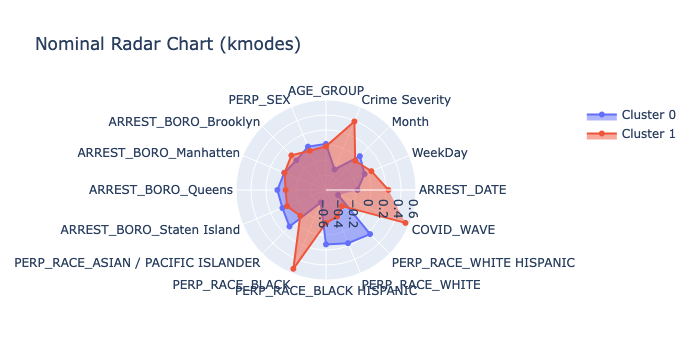

In [13]:
fig = go.Figure()

#TODO: inner for loop so that you can reuse these for any number of clusters
c = kmode_covid_mean #for easy labels
for i in range(0, len(c)): # starts at -1 for DBSCAN who identifies outliers and starts at 0 with kmean/kmode

  fig.add_trace(go.Scatterpolar(
      r=[c.loc[i][0], c.loc[i][1], c.loc[i][2], c.loc[i][3], c.loc[i][4], c.loc[i][5], c.loc[i][6], c.loc[i][7], c.loc[i][8], c.loc[i][9], c.loc[i][10], c.loc[i][11], c.loc[i][12], c.loc[i][13], c.loc[i][14], c.loc[i][15]],
      theta=categories,
      fill='toself',
      name= f'Cluster {i}'
  ))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[-0.6, 0.6]
    )),
  showlegend=True,
  title='Nominal Radar Chart (kmodes)'
)

fig.show()

#### Note: For the presentation, show only one cluster at a time

## K-Prototype Clustering (without dimension reduction) 
#### Note: Using K-Prototype to mix the categorical columns with spatial data (coordinates) 

In [7]:
#deepcopy the dataframe
df_kproto = copy.deepcopy(df)

#drop spatial data (spatial data isnt categorical... boroughs are sufficient in this case)
df_kproto = df_kproto.drop(columns= 'New Georeferenced Column')

#convert the date strings to datetime objects (to be able to scale)
df_kproto['ARREST_DATE'] = df_kproto['ARREST_DATE'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d"))


#convert the datetime objects to timestamps (to be able to scale)
df_kproto['ARREST_DATE'] = df_kproto['ARREST_DATE'].apply(lambda x: datetime.datetime.timestamp(x))

df_kproto

ARREST_DATE  WeekDay  Month  Crime Severity  AGE_GROUP  PERP_SEX  \
0       1.583039e+09        6      3               2          0         1   
1       1.583039e+09        6      3               0          2         1   
2       1.583039e+09        6      3               2          1         1   
3       1.583039e+09        6      3               2          2         0   
4       1.583039e+09        6      3               0          1         1   
...              ...      ...    ...             ...        ...       ...   
122868  1.614488e+09        6      2               2          2         1   
122869  1.614488e+09        6      2               1          0         1   
122870  1.614488e+09        6      2               0          1         1   
122871  1.614488e+09        6      2               2          1         1   
122872  1.614488e+09        6      2               0          1         1   

         Latitude  Longitude  ARREST_BORO_Brooklyn  ARREST_BORO_Manhatten  \
0       40.647951 -73.960606                     1                      0   
1       40.645023 -74.077217                     0                      0   
2       40.829510 -73.888056                     0                      0   
3       40.672574 -73.910176                     1                      0   
4       40.677514 -73.789838                     0                      0   
...           ...        ...                   ...                    ...   
122868  40.736698 -73.983316                     0                      1   
122869  40.836950 -73.927117                     0                      0   
122870  40.753875 -73.984820                     0                      1   
122871  40.823387 -73.870170                     0                      0   
122872  40.715671 -73.983942                     0                      1   

        ARREST_BORO_Queens  ARREST_BORO_Staten Island  \
0                        0                          0   
1                        0                          1   
2                        0                          0   
3                        0                          0   
4                        1                          0   
...                    ...                        ...   
122868                   0                          0   
122869                   0                          0   
122870                   0                          0   
122871                   0                          0   
122872                   0                          0   

        PERP_RACE_ASIAN / PACIFIC ISLANDER  PERP_RACE_BLACK  \
0                                        0                1   
1                                        0                0   
2                                        0                1   
3                                        0                1   
4                                        0                1   
...                                    ...              ...   
122868                                   1                0   
122869                                   0                1   
122870                                   0                1   
122871                                   0                0   
122872                                   0                0   

        PERP_RACE_BLACK HISPANIC  PERP_RACE_WHITE  PERP_RACE_WHITE HISPANIC  \
0                              0                0                         0   
1                              0                0                         1   
2                              0                0                         0   
3                              0                0                         0   
4                              0                0                         0   
...                          ...              ...                       ...   
122868                         0                0                         0   
122869                         0                0                         0   
122870

In [35]:
#Scaling/Normalizing the dataframe for the kmode
#scaler = MinMaxScaler()
scaler = StandardScaler()
df_kproto_scaled=scaler.fit_transform(df_kproto)
df_kproto_scaled = pd.DataFrame(df_kproto_scaled, columns = df_kproto.columns)
df_kproto_scaled

ARREST_DATE   WeekDay     Month  Crime Severity  AGE_GROUP  PERP_SEX  \
0         -1.733220  1.680452 -0.959043        1.226543  -1.536391  0.449311   
1         -1.733220  1.680452 -0.959043       -1.213022   1.569811  0.449311   
2         -1.733220  1.680452 -0.959043        1.226543   0.016710  0.449311   
3         -1.733220  1.680452 -0.959043        1.226543   1.569811 -2.225632   
4         -1.733220  1.680452 -0.959043       -1.213022   0.016710  0.449311   
...             ...       ...       ...             ...        ...       ...   
122868     1.615056  1.680452 -1.236167        1.226543   1.569811  0.449311   
122869     1.615056  1.680452 -1.236167        0.006760  -1.536391  0.449311   
122870     1.615056  1.680452 -1.236167       -1.213022   0.016710  0.449311   
122871     1.615056  1.680452 -1.236167        1.226543   0.016710  0.449311   
122872     1.615056  1.680452 -1.236167       -1.213022   0.016710  0.449311   

        Latitude  Longitude  ARREST_BORO_Brooklyn  ARREST_BORO_Manhatten  \
0      -1.078635  -0.489063              1.625980              -0.548133   
1      -1.113777  -1.980518             -0.615014              -0.548133   
2       1.099929   0.438862             -0.615014              -0.548133   
3      -0.783184   0.155941              1.625980              -0.548133   
4      -0.723906   1.695082             -0.615014              -0.548133   
...          ...        ...                   ...                    ...   
122868 -0.013745  -0.779520             -0.615014               1.824375   
122869  1.189195  -0.060728             -0.615014              -0.548133   
122870  0.192364  -0.798762             -0.615014               1.824375   
122871  1.026458   0.667620             -0.615014              -0.548133   
122872 -0.266058  -0.787523             -0.615014               1.824375   

        ARREST_BORO_Queens  ARREST_BORO_Staten Island  \
0                -0.526258                  -0.217785   
1                -0.526258                   4.591685   
2                -0.526258                  -0.217785   
3                -0.526258                  -0.217785   
4                 1.900208                  -0.217785   
...                    ...                        ...   
122868           -0.526258                  -0.217785   
122869           -0.526258                  -0.217785   
122870           -0.526258                  -0.217785   
122871           -0.526258                  -0.217785   
122872           -0.526258                  -0.217785   

        PERP_RACE_ASIAN / PACIFIC ISLANDER  PERP_RACE_BLACK  \
0                                -0.237295         1.013677   
1                                -0.237295        -0.986508   
2                                -0.237295         1.013677   
3                                -0.237295         1.013677   
4                                -0.237295         1.013677   
...                                    ...              ...   
122868                            4.214171        -0.986508   
122869                           -0.237295         1.013677   
122870                           -0.237295         1.013677   
122871                           -0.237295        -0.986508   
122872                           -0.237295        -0.986508   

        PERP_RACE_BLACK HISPANIC  PERP_RACE_WHITE  PERP_RACE_WHITE HISPANIC  \
0                      -0.307060        -0.359057                 -0.577886   
1                      -0.307060        -0.359057                  1.730445   
2                      -0.307060        -0.359057                 -0.577886   
3                      -0.307060        -0.359057                 -0.577886   
4                      -0.307060        -0.359057                 -0.577886   
...                          ...              ...                       ...   
122868                 -0.307060        -0.359057                 -0.577886   
122869                 -0.307060        -0.359057           

In [16]:
df_kproto_scaled.dtypes

ARREST_DATE                           float64
WeekDay                               float64
Month                                 float64
Crime Severity                        float64
AGE_GROUP                             float64
PERP_SEX                              float64
Latitude                              float64
Longitude                             float64
ARREST_BORO_Brooklyn                  float64
ARREST_BORO_Manhatten                 float64
ARREST_BORO_Queens                    float64
ARREST_BORO_Staten Island             float64
PERP_RACE_ASIAN / PACIFIC ISLANDER    float64
PERP_RACE_BLACK                       float64
PERP_RACE_BLACK HISPANIC              float64
PERP_RACE_WHITE                       float64
PERP_RACE_WHITE HISPANIC              float64
COVID_WAVE                            float64
dtype: object

In [17]:
# Get the position of categorical columns
catColumnsPos = [df_kproto_scaled.columns.get_loc(col) for col in list(df_kproto.select_dtypes('object').columns)]
print('Categorical columns           : {}'.format(list(df_kproto_scaled.select_dtypes('object').columns)))
print('Categorical columns position  : {}'.format(catColumnsPos))

Categorical columns           : []
Categorical columns position  : []


In [18]:
col_names = list(['ARREST_DATE', 'WeekDay', 'Month', 'Crime Severity',
                    'AGE_GROUP', 'PERP_SEX', 'ARREST_BORO_Brooklyn', 'ARREST_BORO_Manhatten',
                    'ARREST_BORO_Queens', 'ARREST_BORO_Staten Island', 'PERP_RACE_ASIAN / PACIFIC ISLANDER',
                    'PERP_RACE_BLACK', 'PERP_RACE_BLACK HISPANIC', 'PERP_RACE_WHITE', 'PERP_RACE_WHITE HISPANIC',
                    'COVID_WAVE'])

catColumnsPos = [df_kproto_scaled.columns.get_loc(col) for col in col_names]
print('Categorical columns           : {}'.format(col_names))
print('Categorical columns position  : {}'.format(catColumnsPos))

Categorical columns           : ['ARREST_DATE', 'WeekDay', 'Month', 'Crime Severity', 'AGE_GROUP', 'PERP_SEX', 'ARREST_BORO_Brooklyn', 'ARREST_BORO_Manhatten', 'ARREST_BORO_Queens', 'ARREST_BORO_Staten Island', 'PERP_RACE_ASIAN / PACIFIC ISLANDER', 'PERP_RACE_BLACK', 'PERP_RACE_BLACK HISPANIC', 'PERP_RACE_WHITE', 'PERP_RACE_WHITE HISPANIC', 'COVID_WAVE']
Categorical columns position  : [0, 1, 2, 3, 4, 5, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]


In [19]:
# Convert dataframe to matrix ###NOTE: This might no longer be necessary in the kmodes version
dfMatrix = df_kproto_scaled.to_numpy()
dfMatrix

array([[-1.73322017,  1.68045246, -0.95904336, ..., -0.35905711,
        -0.57788593, -1.16803524],
       [-1.73322017,  1.68045246, -0.95904336, ..., -0.35905711,
         1.73044532, -1.16803524],
       [-1.73322017,  1.68045246, -0.95904336, ..., -0.35905711,
        -0.57788593, -1.16803524],
       ...,
       [ 1.61505566,  1.68045246, -1.23616719, ..., -0.35905711,
        -0.57788593,  0.85613855],
       [ 1.61505566,  1.68045246, -1.23616719, ..., -0.35905711,
        -0.57788593,  0.85613855],
       [ 1.61505566,  1.68045246, -1.23616719, ..., -0.35905711,
         1.73044532,  0.85613855]])

Note (init = 'Huang')

Selecting ‘Huang’ as the init, the model will select the first k distinct objects from the data set as initial k-modes and then assign the most frequent categories equally to the initial k-modes. 

The ‘Cao’ approach selects prototypes for each data object based on the density of the data point and the dissimilarity value.

In [ ]:
# Choose optimal K using Elbow method
cost = []
for cluster in range(1, 10):
    try:
        kprototype = KPrototypes(n_jobs = -1, n_clusters = cluster, init = 'Huang', random_state = 0)
        kprototype.fit_predict(dfMatrix, categorical = catColumnsPos)
        cost.append(kprototype.cost_)
        print('Cluster initiation: {}'.format(cluster))
    except Exception as e:
        print(e)
        break# Converting the results into a dataframe and plotting them
cost

In [ ]:
df_cost = pd.DataFrame({'Cluster':range(1, 10), 'Cost':cost})# Data viz, note: range (is the number of clusters)
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_cost)+
    geom_line(aes(x = 'Cluster',
                  y = 'Cost'))+
    geom_point(aes(x = 'Cluster',
                   y = 'Cost'))+
    geom_label(aes(x = 'Cluster',
                   y = 'Cost',
                   label = 'Cluster'),
               size = 10,
               nudge_y = 1000) +
    labs(title = 'Optimal number of cluster with Elbow Method')+
    xlab('Number of Clusters k')+
    ylab('Cost')+
    theme_minimal()
)

#### Note: k= 4 (3 or 5)

In [21]:
# Fit the cluster
kprototype = KPrototypes(n_jobs = -1, n_clusters = 3, init = 'Huang', random_state = 0)
kprototype.fit_predict(dfMatrix, categorical = catColumnsPos)

array([2, 2, 1, ..., 2, 1, 2], dtype=uint16)

In [22]:
import pickle
#save the model to disk
#kprotoModel = 'covid_kproto_5c_model.sav'
#pickle.dump(kprototype, open(kprotoModel, 'wb'))

#load the model from disk
#kprototype = pickle.load(open('finalized_model.sav', 'rb'))

In [23]:
# Cluster centroid
kprototype.cluster_centroids_

array([[-0.40493069,  1.31130899, -1.63241929,  0.08316227, -0.4047957 ,
         1.22654266,  0.01670993,  0.44931058, -0.61501354, -0.54813302,
         1.90020845, -0.21778496, -0.2372946 , -0.98650788, -0.30706029,
        -0.35905711, -0.57788593,  0.85613855],
       [ 1.00074242,  0.08871005, -1.70562449, -0.44926779, -1.51329102,
         0.00676041,  0.01670993,  0.44931058, -0.61501354, -0.54813302,
        -0.52625805, -0.21778496, -0.2372946 , -0.98650788, -0.30706029,
        -0.35905711, -0.57788593,  0.85613855],
       [-0.83694755, -0.72981998, -0.88733593, -0.44926779, -0.4047957 ,
        -1.21302184,  0.01670993,  0.44931058,  1.62598046, -0.54813302,
        -0.52625805, -0.21778496, -0.2372946 ,  1.01367665, -0.30706029,
        -0.35905711, -0.57788593,  0.85613855]])

In [24]:
# Check the iteration of the clusters created
kprototype.n_iter_

7

In [25]:
# Check the cost of the clusters created
kprototype.cost_

441806.13827562326

In [29]:
# Add the cluster to the dataframe
df_kproto_scaled['Cluster Labels'] = kprototype.labels_
df_kproto_scaled['Segment'] = df_kproto_scaled['Cluster Labels'].map({0:'First', 1:'Second', 2:'Third'})
# Order the cluster
df_kproto_scaled['Segment'] = df_kproto_scaled['Segment'].astype('category')
df_kproto_scaled['Segment'] = df_kproto_scaled['Segment'].cat.reorder_categories(['First','Second','Third'])
df_kproto_scaled

ARREST_DATE   WeekDay     Month  Crime Severity  AGE_GROUP  PERP_SEX  \
0         -1.733220  1.680452 -0.959043        1.226543  -1.536391  0.449311   
1         -1.733220  1.680452 -0.959043       -1.213022   1.569811  0.449311   
2         -1.733220  1.680452 -0.959043        1.226543   0.016710  0.449311   
3         -1.733220  1.680452 -0.959043        1.226543   1.569811 -2.225632   
4         -1.733220  1.680452 -0.959043       -1.213022   0.016710  0.449311   
...             ...       ...       ...             ...        ...       ...   
122868     1.615056  1.680452 -1.236167        1.226543   1.569811  0.449311   
122869     1.615056  1.680452 -1.236167        0.006760  -1.536391  0.449311   
122870     1.615056  1.680452 -1.236167       -1.213022   0.016710  0.449311   
122871     1.615056  1.680452 -1.236167        1.226543   0.016710  0.449311   
122872     1.615056  1.680452 -1.236167       -1.213022   0.016710  0.449311   

        Latitude  Longitude  ARREST_BORO_Brooklyn  ARREST_BORO_Manhatten  \
0      -1.078635  -0.489063              1.625980              -0.548133   
1      -1.113777  -1.980518             -0.615014              -0.548133   
2       1.099929   0.438862             -0.615014              -0.548133   
3      -0.783184   0.155941              1.625980              -0.548133   
4      -0.723906   1.695082             -0.615014              -0.548133   
...          ...        ...                   ...                    ...   
122868 -0.013745  -0.779520             -0.615014               1.824375   
122869  1.189195  -0.060728             -0.615014              -0.548133   
122870  0.192364  -0.798762             -0.615014               1.824375   
122871  1.026458   0.667620             -0.615014              -0.548133   
122872 -0.266058  -0.787523             -0.615014               1.824375   

        ARREST_BORO_Queens  ARREST_BORO_Staten Island  \
0                -0.526258                  -0.217785   
1                -0.526258                   4.591685   
2                -0.526258                  -0.217785   
3                -0.526258                  -0.217785   
4                 1.900208                  -0.217785   
...                    ...                        ...   
122868           -0.526258                  -0.217785   
122869           -0.526258                  -0.217785   
122870           -0.526258                  -0.217785   
122871           -0.526258                  -0.217785   
122872           -0.526258                  -0.217785   

        PERP_RACE_ASIAN / PACIFIC ISLANDER  PERP_RACE_BLACK  \
0                                -0.237295         1.013677   
1                                -0.237295        -0.986508   
2                                -0.237295         1.013677   
3                                -0.237295         1.013677   
4                                -0.237295         1.013677   
...                                    ...              ...   
122868                            4.214171        -0.986508   
122869                           -0.237295         1.013677   
122870                           -0.237295         1.013677   
122871                           -0.237295        -0.986508   
122872                           -0.237295        -0.986508   

        PERP_RACE_BLACK HISPANIC  PERP_RACE_WHITE  PERP_RACE_WHITE HISPANIC  \
0                      -0.307060        -0.359057                 -0.577886   
1                      -0.307060        -0.359057                  1.730445   
2                      -0.307060        -0.359057                 -0.577886   
3                      -0.307060        -0.359057                 -0.577886   
4                      -0.307060        -0.359057                 -0.577886   
...                          ...              ...                       ...   
122868                 -0.307060        -0.359057                 -0.577886   
122869                 -0.307060        -0.359057           

In [30]:
# Cluster interpretation , Note: numerical variables - avg & categorical - mode
#### Note: Can use other ways like: median, percentile, or value composition for categorical variables.
df_kproto_scaled.rename(columns = {'Cluster Labels':'Total'}, inplace = True)
kproto_covid_mean = df_kproto_scaled.groupby('Segment').agg(
    {
        'Total':'count',
        'ARREST_DATE': lambda x: x.value_counts().index[0],
        'WeekDay': lambda x: x.value_counts().index[0],
        'Month': lambda x: x.value_counts().index[0],
        'Crime Severity': lambda x: x.value_counts().index[0],
        'AGE_GROUP': lambda x: x.value_counts().index[0],
        'PERP_SEX': lambda x: x.value_counts().index[0],
        'ARREST_BORO_Brooklyn': lambda x: x.value_counts().index[0],
        'ARREST_BORO_Manhatten': lambda x: x.value_counts().index[0],
        'ARREST_BORO_Queens': lambda x: x.value_counts().index[0],
        'ARREST_BORO_Staten Island': lambda x: x.value_counts().index[0],
        'PERP_RACE_ASIAN / PACIFIC ISLANDER': lambda x: x.value_counts().index[0],
        'PERP_RACE_BLACK': lambda x: x.value_counts().index[0],
        'PERP_RACE_BLACK HISPANIC': lambda x: x.value_counts().index[0],
        'PERP_RACE_WHITE': lambda x: x.value_counts().index[0],
        'PERP_RACE_WHITE HISPANIC': lambda x: x.value_counts().index[0],
        'COVID_WAVE': lambda x: x.value_counts().index[0],
        'Latitude': lambda x: stats.mode(round(x, 2)) ,
        'Longitude': lambda x: stats.mode(round(x, 2))
    }
).reset_index()

#displaying only the mode (not the count) for both lat and long
kproto_covid_mean['Latitude'] = kproto_covid_mean['Latitude'].apply( lambda x: x.mode.item())
kproto_covid_mean['Longitude'] = kproto_covid_mean['Longitude'].apply( lambda x: x.mode.item())
kproto_covid_mean

Segment  Total  ARREST_DATE   WeekDay     Month  Crime Severity  AGE_GROUP  \
0   First  23730    -1.632419  0.083162 -0.404796        1.226543    0.01671   
1  Second  50382    -1.705624 -0.449268 -1.513291        0.006760    0.01671   
2   Third  48761    -0.887336 -0.449268 -0.404796       -1.213022    0.01671   

   PERP_SEX  ARREST_BORO_Brooklyn  ARREST_BORO_Manhatten  ARREST_BORO_Queens  \
0  0.449311             -0.615014              -0.548133            1.900208   
1  0.449311             -0.615014              -0.548133           -0.526258   
2  0.449311              1.625980              -0.548133           -0.526258   

   ARREST_BORO_Staten Island  PERP_RACE_ASIAN / PACIFIC ISLANDER  \
0                  -0.217785                           -0.237295   
1                  -0.217785                           -0.237295   
2                  -0.217785                           -0.237295   

   PERP_RACE_BLACK  PERP_RACE_BLACK HISPANIC  PERP_RACE_WHITE  \
0        -0.986508                  -0.30706        -0.359057   
1        -0.986508                  -0.30706        -0.359057   
2         1.013677                  -0.30706        -0.359057   

   PERP_RACE_WHITE HISPANIC  COVID_WAVE  Latitude  Longitude  
0                 -0.577886    0.856139     -0.69       1.87  
1                 -0.577886    0.856139      0.94       0.28  
2                 -0.577886    0.856139     -0.80      -0.36

In [31]:
#PLOT RADAR CHART - to get an overview of the clusters on the features

categories = list(kproto_covid_mean.drop(columns=['Segment','Total'])) #list of all column names
categories

['ARREST_DATE',
 'WeekDay',
 'Month',
 'Crime Severity',
 'AGE_GROUP',
 'PERP_SEX',
 'ARREST_BORO_Brooklyn',
 'ARREST_BORO_Manhatten',
 'ARREST_BORO_Queens',
 'ARREST_BORO_Staten Island',
 'PERP_RACE_ASIAN / PACIFIC ISLANDER',
 'PERP_RACE_BLACK',
 'PERP_RACE_BLACK HISPANIC',
 'PERP_RACE_WHITE',
 'PERP_RACE_WHITE HISPANIC',
 'COVID_WAVE',
 'Latitude',
 'Longitude']

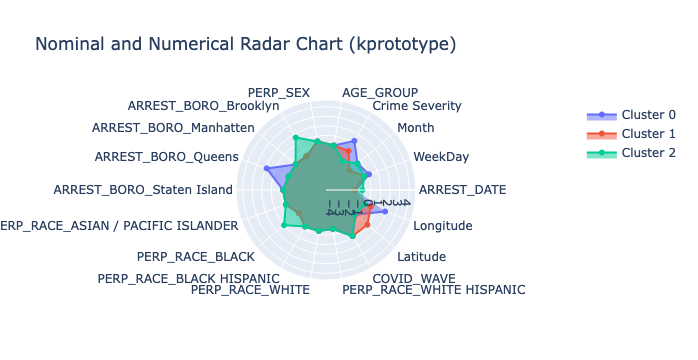

In [33]:
fig = go.Figure()

#TODO: inner for loop so that you can reuse these for any number of clusters
c = kproto_covid_mean.drop(columns=['Segment','Total']) #for easy labels
for i in range(0, len(c)): # len(c), starts at -1 for DBSCAN who identifies outliers and starts at 0 with kmean/kmode

  fig.add_trace(go.Scatterpolar(
      r=[c.loc[i][0], c.loc[i][1], c.loc[i][2], c.loc[i][3], c.loc[i][4], c.loc[i][5], c.loc[i][6], c.loc[i][7], c.loc[i][8], c.loc[i][9], c.loc[i][10], c.loc[i][11], c.loc[i][12], c.loc[i][13], c.loc[i][14], c.loc[i][15], c.loc[i][16], c.loc[i][17]],
      theta=categories,
      fill='toself',
      name= f'Cluster {i}'
  ))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[-4.7, 4.7]
    )),
  showlegend=True,
  title='Nominal and Numerical Radar Chart (kprototype)'
)

fig.show()

### CONCLUSION
The best clusters (without dimension reduction) are:
        - with k-prototype with 3 clusters. 
        - with k-modes with 2 clusters.

# Dimensionality Reduction¶

<b>Notes on LDA versus PCA</b>

In case of uniformly distributed data, LDA almost always performs better than PCA. However if the data is highly skewed (irregularly distributed) then it is advised to use PCA since LDA can be biased towards the majority class.

Finally, it is beneficial that PCA can be applied to labeled as well as unlabeled data since it doesn't rely on the output labels. On the other hand, LDA requires output classes for finding linear discriminants and hence requires labeled data.

<b>Notes on SVD versus PCA</b>

SVD usually means an SVD of the design matrix, while PCA is an SVD of the covariance matrix.

What is the difference between SVD and PCA? SVD gives you the whole nine-yard of diagonalizing a matrix into special matrices that are easy to manipulate and to analyze. It lay down the foundation to untangle data into independent components. PCA skips less significant components.

One way to choose: if it’s a sparse matrix, SVD - since subtracting the mean would make the matrix non-sparse in general, otherwise PCA.

## Principal Component Analysis (PCA) : General Modeling

#### Note: When applying PCA on features (instead of after clustering), it is better to pick n_components such that we can still explain 90% of the vairance in the data.

In [ ]:
#Scaling/Normalizing the dataframe for the kmode
#scaler = MinMaxScaler()
scaler = StandardScaler()
df_kproto_scaled=scaler.fit_transform(df_kproto)
df_kproto_scaled = pd.DataFrame(df_kproto_scaled, columns = df_kproto.columns)
df_kproto_scaled

In [36]:
#Create PCAs to determine the right number of components

#pcamodel = PCA(n_components=2) # components stands for up to the number of features of the database
pcamodel = PCA()
#X_standardized = StandardScaler().fit_transform(df_kproto_scaled)
pcamodel.fit(df_kproto_scaled)
X_reduced_dim = pcamodel.transform(df_kproto_scaled)

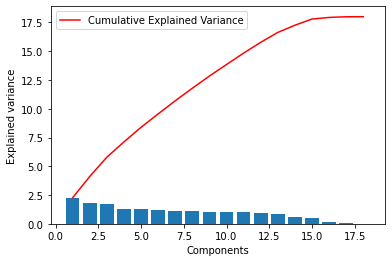

In [37]:
#cumulative explained_variance_ratio plot.
plt.bar(range(1,len(pcamodel.explained_variance_ )+1),pcamodel.explained_variance_ )
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.plot(range(1,len(pcamodel.explained_variance_ )+1),
         np.cumsum(pcamodel.explained_variance_),
         c='red',
         label="Cumulative Explained Variance")
plt.legend(loc='upper left')

#### Note: best fit at components = 3 or 15 (Would go for 3 since we have almost 15 features!)

In [38]:
# Create a PCA model with 3 components

pcamodel_dfkproto = PCA(n_components=3) # components stands for up to the number of features of the database
#pcamodel = PCA()
#X_standardized = StandardScaler().fit_transform(cst2_scaled)
pcamodel_dfkproto.fit(df_kproto_scaled) # fits it to the right model (like the line in LR)
dfkproto_reduced_dim = pcamodel_dfkproto.transform(df_kproto_scaled) # applies the model to the original standardized data to be reused.
dfkproto_reduced_dim #NOTE: Dont need to transform it into a numpy array (matrix for kproto)

array([[ 1.27433285,  1.37144133, -1.28715113],
       [ 3.07071727, -0.67982679,  2.96481506],
       [-0.86513586, -0.21606861, -1.26503102],
       ...,
       [ 0.60198505, -1.53888273, -1.36799635],
       [-1.31341895, -1.21671232,  0.22078515],
       [ 0.32898305, -1.90067779,  1.13340655]])

In [39]:
dfMatrix_pca = dfkproto_reduced_dim

## Singular Value Decomposition (SVD) : Topic Modelling

#### Might have to test out different n-components for SVD and access each one with a sillhoutte anlaysis on the cluster model instead, quite time consuming

## Latente Dirichlet Analysis (LDA) : Probabilistic

# Clustering Models with Dimensionality Reduction¶

## K-Prototype Clustering (with dimension reduction) 
### for visualization purposes

In [40]:
#TEST: THIS CODE IS FOR DOING PCA AFTER CLUSTERING (for better plotting) 

#loading kprototype (with 3 clusters) from disk
kproto_model_3c = pickle.load(open('Models/covid_kproto_3c_model.sav', 'rb'))

# Cluster centroid
centroids = kproto_model_3c.cluster_centroids_

In [ ]:
centroids

In [ ]:
kproto_model_3c

In [41]:
y = kproto_model_3c.predict(dfMatrix, categorical = catColumnsPos)

In [42]:
df_kproto_scaled

ARREST_DATE   WeekDay     Month  Crime Severity  AGE_GROUP  PERP_SEX  \
0         -1.733220  1.680452 -0.959043        1.226543  -1.536391  0.449311   
1         -1.733220  1.680452 -0.959043       -1.213022   1.569811  0.449311   
2         -1.733220  1.680452 -0.959043        1.226543   0.016710  0.449311   
3         -1.733220  1.680452 -0.959043        1.226543   1.569811 -2.225632   
4         -1.733220  1.680452 -0.959043       -1.213022   0.016710  0.449311   
...             ...       ...       ...             ...        ...       ...   
122868     1.615056  1.680452 -1.236167        1.226543   1.569811  0.449311   
122869     1.615056  1.680452 -1.236167        0.006760  -1.536391  0.449311   
122870     1.615056  1.680452 -1.236167       -1.213022   0.016710  0.449311   
122871     1.615056  1.680452 -1.236167        1.226543   0.016710  0.449311   
122872     1.615056  1.680452 -1.236167       -1.213022   0.016710  0.449311   

        Latitude  Longitude  ARREST_BORO_Brooklyn  ARREST_BORO_Manhatten  \
0      -1.078635  -0.489063              1.625980              -0.548133   
1      -1.113777  -1.980518             -0.615014              -0.548133   
2       1.099929   0.438862             -0.615014              -0.548133   
3      -0.783184   0.155941              1.625980              -0.548133   
4      -0.723906   1.695082             -0.615014              -0.548133   
...          ...        ...                   ...                    ...   
122868 -0.013745  -0.779520             -0.615014               1.824375   
122869  1.189195  -0.060728             -0.615014              -0.548133   
122870  0.192364  -0.798762             -0.615014               1.824375   
122871  1.026458   0.667620             -0.615014              -0.548133   
122872 -0.266058  -0.787523             -0.615014               1.824375   

        ARREST_BORO_Queens  ARREST_BORO_Staten Island  \
0                -0.526258                  -0.217785   
1                -0.526258                   4.591685   
2                -0.526258                  -0.217785   
3                -0.526258                  -0.217785   
4                 1.900208                  -0.217785   
...                    ...                        ...   
122868           -0.526258                  -0.217785   
122869           -0.526258                  -0.217785   
122870           -0.526258                  -0.217785   
122871           -0.526258                  -0.217785   
122872           -0.526258                  -0.217785   

        PERP_RACE_ASIAN / PACIFIC ISLANDER  PERP_RACE_BLACK  \
0                                -0.237295         1.013677   
1                                -0.237295        -0.986508   
2                                -0.237295         1.013677   
3                                -0.237295         1.013677   
4                                -0.237295         1.013677   
...                                    ...              ...   
122868                            4.214171        -0.986508   
122869                           -0.237295         1.013677   
122870                           -0.237295         1.013677   
122871                           -0.237295        -0.986508   
122872                           -0.237295        -0.986508   

        PERP_RACE_BLACK HISPANIC  PERP_RACE_WHITE  PERP_RACE_WHITE HISPANIC  \
0                      -0.307060        -0.359057                 -0.577886   
1                      -0.307060        -0.359057                  1.730445   
2                      -0.307060        -0.359057                 -0.577886   
3                      -0.307060        -0.359057                 -0.577886   
4                      -0.307060        -0.359057                 -0.577886   
...                          ...              ...                       ...   
122868                 -0.307060        -0.359057                 -0.577886   
122869                 -0.307060        -0.359057           

In [ ]:
y

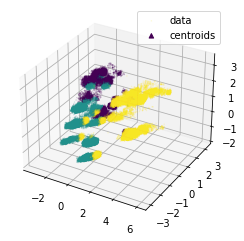

In [43]:
k = 3 # Because the clustering model was trained with 3 clusters
# Reduce dimensionality of the original data and centroids for visualization purposes
pca = PCA(n_components=3).fit(df_kproto_scaled.values) # .values because PCA must either all use dataframes or all numpys
X_reduced = pca.transform(df_kproto_scaled.values)
centroids_reduced = pca.transform(centroids)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Plot the data and colour code according to cluster assignments (y) # model.predict(X)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y, label='data', alpha = 0.2, s = 0.2)

# Plot the centroids using a different marker (triangles) and colour code according to cluster index
ax.scatter(centroids_reduced[:, 0], centroids_reduced[:, 1], centroids_reduced[:, 2], c=list(range(k)), label='centroids', marker='^')

# Show the legend
ax.legend()

# Show the plot
#plt.plot()
plt.show()

In [104]:
pd.DataFrame(X_reduced)

0         1         2
0       1.276871  1.373369 -1.290422
1       3.072864 -0.679131  2.962009
2      -0.858684 -0.211418 -1.266542
3       0.869892  1.367136 -1.207885
4      -1.532017  1.932224 -0.560092
...          ...       ...       ...
122868 -0.122308 -0.810964  0.909305
122869 -0.458866 -0.466527 -1.424974
122870  0.597969 -1.540362 -1.374466
122871 -1.318143 -1.218712  0.232567
122872  0.322276 -1.904420  1.124634

[122873 rows x 3 columns]

## K-Means Clustering (with dimension reduction to engineer features) 

In [44]:
PCA_components = pd.DataFrame(dfkproto_reduced_dim)
PCA_components

0         1         2
0       1.274333  1.371441 -1.287151
1       3.070717 -0.679827  2.964815
2      -0.865136 -0.216069 -1.265031
3       0.874090  1.369269 -1.214022
4      -1.531520  1.931821 -0.556113
...          ...       ...       ...
122868 -0.121486 -0.810714  0.917016
122869 -0.463223 -0.470068 -1.421621
122870  0.601985 -1.538883 -1.367996
122871 -1.313419 -1.216712  0.220785
122872  0.328983 -1.900678  1.133407

[122873 rows x 3 columns]

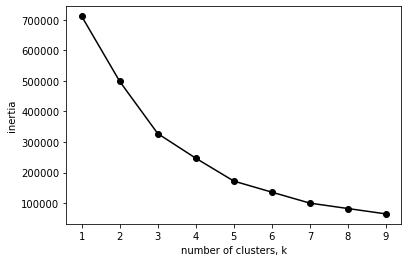

In [45]:
#Find the optimal k value for kMeans
from sklearn.cluster import KMeans
ks = range(1, 10)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [46]:
#### Note: k = 3 (or 5 or 7)

In [47]:
#Fit k-means on the reduced dimension dataframe
km_from_pca = KMeans(n_clusters=3, # how many clusters we expected (value of k) 
            n_init=10,
            random_state=0,)

y_km_pca_clusters = km_from_pca.fit_predict(dfkproto_reduced_dim)
y_km_pca_clusters

array([2, 2, 0, ..., 0, 0, 0], dtype=int32)

In [55]:
PCA_with_Clusters = pd.DataFrame(df_kproto_scaled) #TODO: Use original kproto scaled not the reduced one
PCA_with_Clusters['Clusters'] = y_km_pca_clusters

In [56]:
PCA_with_Clusters

ARREST_DATE   WeekDay     Month  Crime Severity  AGE_GROUP  PERP_SEX  \
0         -1.733220  1.680452 -0.959043        1.226543  -1.536391  0.449311   
1         -1.733220  1.680452 -0.959043       -1.213022   1.569811  0.449311   
2         -1.733220  1.680452 -0.959043        1.226543   0.016710  0.449311   
3         -1.733220  1.680452 -0.959043        1.226543   1.569811 -2.225632   
4         -1.733220  1.680452 -0.959043       -1.213022   0.016710  0.449311   
...             ...       ...       ...             ...        ...       ...   
122868     1.615056  1.680452 -1.236167        1.226543   1.569811  0.449311   
122869     1.615056  1.680452 -1.236167        0.006760  -1.536391  0.449311   
122870     1.615056  1.680452 -1.236167       -1.213022   0.016710  0.449311   
122871     1.615056  1.680452 -1.236167        1.226543   0.016710  0.449311   
122872     1.615056  1.680452 -1.236167       -1.213022   0.016710  0.449311   

        Latitude  Longitude  ARREST_BORO_Brooklyn  ARREST_BORO_Manhatten  \
0      -1.078635  -0.489063              1.625980              -0.548133   
1      -1.113777  -1.980518             -0.615014              -0.548133   
2       1.099929   0.438862             -0.615014              -0.548133   
3      -0.783184   0.155941              1.625980              -0.548133   
4      -0.723906   1.695082             -0.615014              -0.548133   
...          ...        ...                   ...                    ...   
122868 -0.013745  -0.779520             -0.615014               1.824375   
122869  1.189195  -0.060728             -0.615014              -0.548133   
122870  0.192364  -0.798762             -0.615014               1.824375   
122871  1.026458   0.667620             -0.615014              -0.548133   
122872 -0.266058  -0.787523             -0.615014               1.824375   

        ARREST_BORO_Queens  ARREST_BORO_Staten Island  \
0                -0.526258                  -0.217785   
1                -0.526258                   4.591685   
2                -0.526258                  -0.217785   
3                -0.526258                  -0.217785   
4                 1.900208                  -0.217785   
...                    ...                        ...   
122868           -0.526258                  -0.217785   
122869           -0.526258                  -0.217785   
122870           -0.526258                  -0.217785   
122871           -0.526258                  -0.217785   
122872           -0.526258                  -0.217785   

        PERP_RACE_ASIAN / PACIFIC ISLANDER  PERP_RACE_BLACK  \
0                                -0.237295         1.013677   
1                                -0.237295        -0.986508   
2                                -0.237295         1.013677   
3                                -0.237295         1.013677   
4                                -0.237295         1.013677   
...                                    ...              ...   
122868                            4.214171        -0.986508   
122869                           -0.237295         1.013677   
122870                           -0.237295         1.013677   
122871                           -0.237295        -0.986508   
122872                           -0.237295        -0.986508   

        PERP_RACE_BLACK HISPANIC  PERP_RACE_WHITE  PERP_RACE_WHITE HISPANIC  \
0                      -0.307060        -0.359057                 -0.577886   
1                      -0.307060        -0.359057                  1.730445   
2                      -0.307060        -0.359057                 -0.577886   
3                      -0.307060        -0.359057                 -0.577886   
4                      -0.307060        -0.359057                 -0.577886   
...                          ...              ...                       ...   
122868                 -0.307060        -0.359057                 -0.577886   
122869                 -0.307060        -0.359057           

In [70]:
#saving clusters into csv for Tableau
#PCA_with_Clusters.to_csv('covid_w_pca_clusters.csv', index=False)
pca_with_clusters = copy.deepcopy(df_kproto)
pca_with_clusters['clusters'] = y_km_pca_clusters
pca_with_clusters.to_csv('covid_w_pca_clusters.csv', index=False)

In [59]:
#Create the r scales for the Radar Chart for KMeans
#NOTE: r = avg value of the columns for that particular cluster

#adding cluster(name_clusters) to the standardized database name_scaled on reduced dim
#km_from_pca_clusters = (PCA_components).assign(clusters = y_km_pca_clusters) 

#create mean of all
km_from_pca_clusters_mean = PCA_with_Clusters.groupby(['Clusters']).mean()

km_from_pca_clusters_mean # centroids

ARREST_DATE   WeekDay     Month  Crime Severity  AGE_GROUP  \
Clusters                                                               
0           -0.004224 -0.020632 -0.005844        0.040063   0.008808   
1           -0.014205  0.014069  0.005583        0.006001   0.000388   
2            0.015992  0.019908  0.004524       -0.061897  -0.012958   

          PERP_SEX  Latitude  Longitude  ARREST_BORO_Brooklyn  \
Clusters                                                        
0        -0.006662  0.852781  -0.094920             -0.614696   
1        -0.008691 -0.270284   1.144933             -0.605085   
2         0.015658 -1.039929  -0.661799              1.307490   

          ARREST_BORO_Manhatten  ARREST_BORO_Queens  \
Clusters                                              
0                      0.645902           -0.526258   
1                     -0.548133            1.841390   
2                     -0.548133           -0.526196   

          ARREST_BORO_Staten Island  PERP_RACE_ASIAN / PACIFIC ISLANDER  \
Clusters                                                                  
0                         -0.217785                           -0.182052   
1                         -0.217785                            0.466203   
2                          0.465615                           -0.062906   

          PERP_RACE_BLACK  PERP_RACE_BLACK HISPANIC  PERP_RACE_WHITE  \
Clusters                                                               
0                0.013230                  0.171341        -0.111400   
1               -0.215584                 -0.144206         0.004055   
2                0.131301                 -0.146242         0.157644   

          PERP_RACE_WHITE HISPANIC  COVID_WAVE  
Clusters                                        
0                         0.051436    0.013899  
1                         0.093736   -0.039731  
2                        -0.139470    0.007688

In [ ]:
#TODO HERE!!!!!!

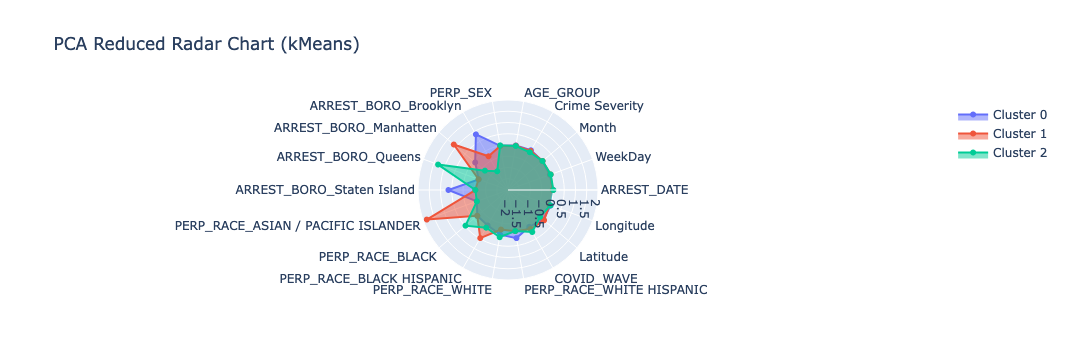

In [61]:
#Radar Chart for the PCA reduced KMeans

fig = go.Figure()

#TODO: inner for loop so that you can reuse these for any number of clusters
c =  km_from_pca_clusters_mean#for easy labels
for i in range(0, len(c)): # , starts at -1 for DBSCAN who identifies outliers and starts at 0 with kmean/kmode

    fig.add_trace(go.Scatterpolar(
        r=[c.loc[i][0], c.loc[i][1], c.loc[i][2], c.loc[i][3], c.loc[i][4], c.loc[i][5], c.loc[i][6], c.loc[i][7], c.loc[i][8], c.loc[i][9], c.loc[i][10], c.loc[i][11], c.loc[i][12], c.loc[i][13], c.loc[i][14], c.loc[i][15], c.loc[i][16], c.loc[i][17]],
        theta=categories,
        fill='toself',
        name= f'Cluster {i}'
    ))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[-2, 2]
    )),
  showlegend=True,
  title='PCA Reduced Radar Chart (kMeans)'
)

fig.show()

#### Note: PCA reduced (feature engineered) kMeans with 3 components is not effective.

Suspecting PCAs will not effectively reduce the clusters that are already low in numbers.

# CLUSTER EVALUATIONS

## KMeans Evaluations

For n_clusters = 2 The average silhouette_score is : 0.1552689137251022
For n_clusters = 3 The average silhouette_score is : 0.17004186976596078
For n_clusters = 4 The average silhouette_score is : 0.19406012283322127
For n_clusters = 5 The average silhouette_score is : 0.20578211264669644
For n_clusters = 6 The average silhouette_score is : 0.17923386112706993


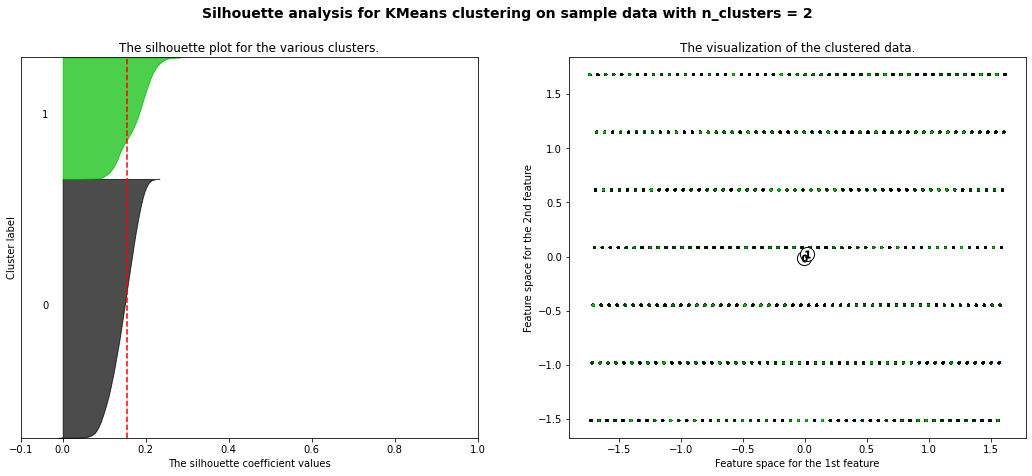

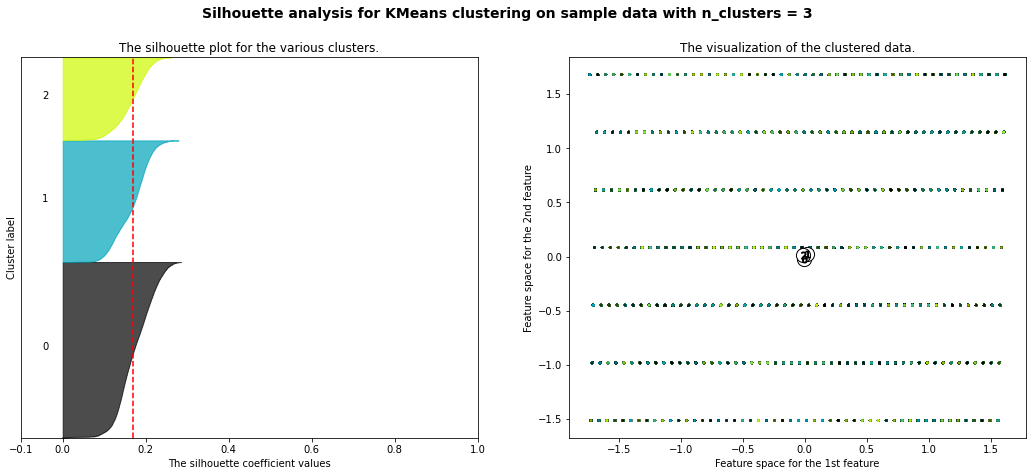

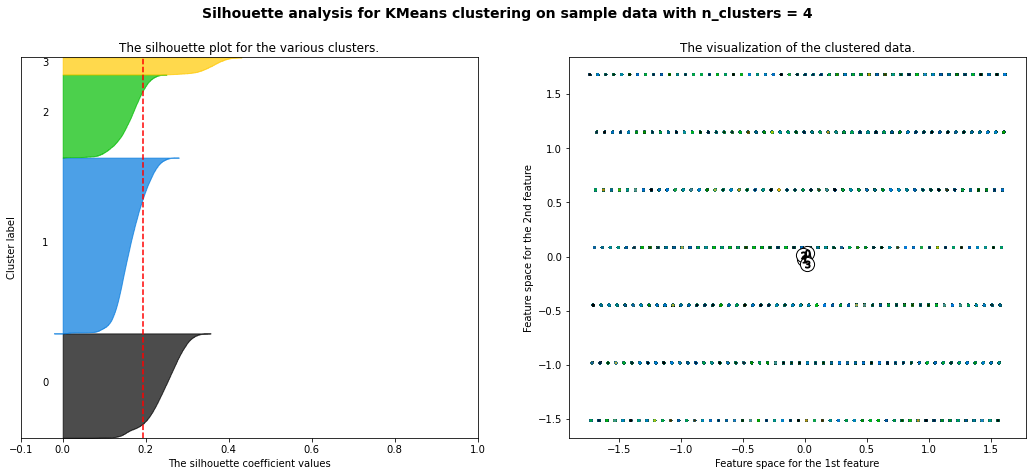

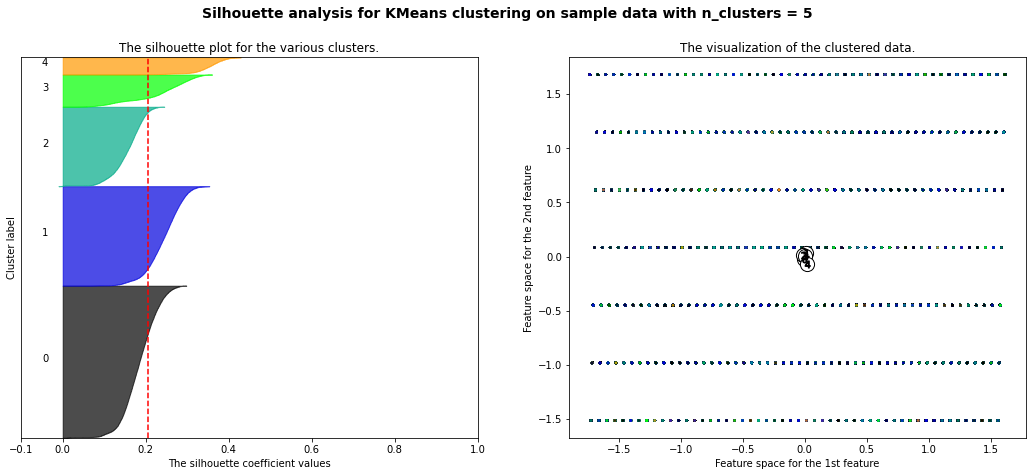

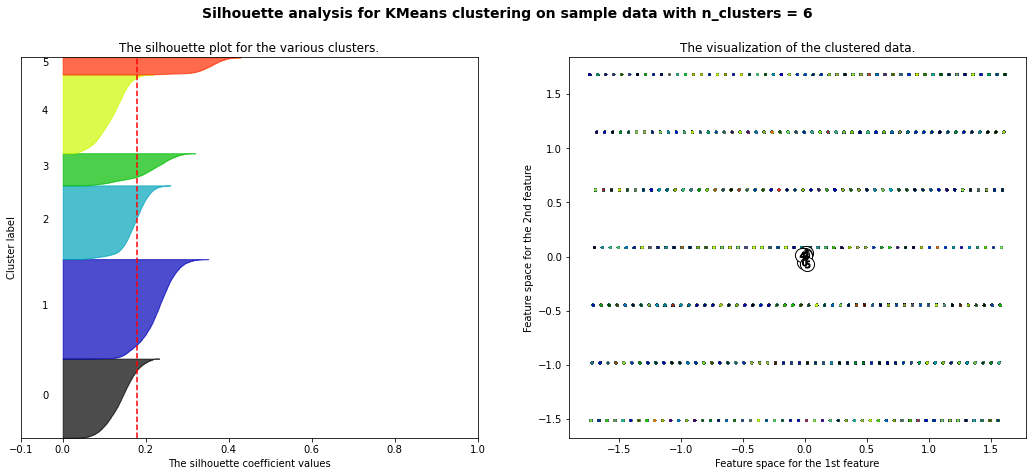

In [71]:
X = df_kproto_scaled

range_n_clusters = [2, 3, 4, 5, 6] #TODO: USe the saved models parameters

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    '''ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )'''
    ax2.scatter(
        X.iloc[:, 0], X.iloc[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

#### Conclusion: 

All k-means cluster numbers are suboptimal due to the presence of clusters with below-average silhouette scores; clusters aren't very dense and nicely separated
    
However, the winner is where n_clusters = 3 since there's less fluctuations in the size of the silhouette plots.


In [109]:
df_kproto_scaled

ARREST_DATE   WeekDay     Month  Crime Severity  AGE_GROUP  PERP_SEX  \
0         -1.733220  1.680452 -0.959043        1.226543  -1.536391  0.449311   
1         -1.733220  1.680452 -0.959043       -1.213022   1.569811  0.449311   
2         -1.733220  1.680452 -0.959043        1.226543   0.016710  0.449311   
3         -1.733220  1.680452 -0.959043        1.226543   1.569811 -2.225632   
4         -1.733220  1.680452 -0.959043       -1.213022   0.016710  0.449311   
...             ...       ...       ...             ...        ...       ...   
122868     1.615056  1.680452 -1.236167        1.226543   1.569811  0.449311   
122869     1.615056  1.680452 -1.236167        0.006760  -1.536391  0.449311   
122870     1.615056  1.680452 -1.236167       -1.213022   0.016710  0.449311   
122871     1.615056  1.680452 -1.236167        1.226543   0.016710  0.449311   
122872     1.615056  1.680452 -1.236167       -1.213022   0.016710  0.449311   

        Latitude  Longitude  ARREST_BORO_Brooklyn  ARREST_BORO_Manhatten  \
0      -1.078635  -0.489063              1.625980              -0.548133   
1      -1.113777  -1.980518             -0.615014              -0.548133   
2       1.099929   0.438862             -0.615014              -0.548133   
3      -0.783184   0.155941              1.625980              -0.548133   
4      -0.723906   1.695082             -0.615014              -0.548133   
...          ...        ...                   ...                    ...   
122868 -0.013745  -0.779520             -0.615014               1.824375   
122869  1.189195  -0.060728             -0.615014              -0.548133   
122870  0.192364  -0.798762             -0.615014               1.824375   
122871  1.026458   0.667620             -0.615014              -0.548133   
122872 -0.266058  -0.787523             -0.615014               1.824375   

        ARREST_BORO_Queens  ARREST_BORO_Staten Island  \
0                -0.526258                  -0.217785   
1                -0.526258                   4.591685   
2                -0.526258                  -0.217785   
3                -0.526258                  -0.217785   
4                 1.900208                  -0.217785   
...                    ...                        ...   
122868           -0.526258                  -0.217785   
122869           -0.526258                  -0.217785   
122870           -0.526258                  -0.217785   
122871           -0.526258                  -0.217785   
122872           -0.526258                  -0.217785   

        PERP_RACE_ASIAN / PACIFIC ISLANDER  PERP_RACE_BLACK  \
0                                -0.237295         1.013677   
1                                -0.237295        -0.986508   
2                                -0.237295         1.013677   
3                                -0.237295         1.013677   
4                                -0.237295         1.013677   
...                                    ...              ...   
122868                            4.214171        -0.986508   
122869                           -0.237295         1.013677   
122870                           -0.237295         1.013677   
122871                           -0.237295        -0.986508   
122872                           -0.237295        -0.986508   

        PERP_RACE_BLACK HISPANIC  PERP_RACE_WHITE  PERP_RACE_WHITE HISPANIC  \
0                      -0.307060        -0.359057                 -0.577886   
1                      -0.307060        -0.359057                  1.730445   
2                      -0.307060        -0.359057                 -0.577886   
3                      -0.307060        -0.359057                 -0.577886   
4                      -0.307060        -0.359057                 -0.577886   
...                          ...              ...                       ...   
122868                 -0.307060        -0.359057                 -0.577886   
122869                 -0.307060        -0.359057           

## KPrototype Evaluations

For n_clusters = 2 The average silhouette_score is : 0.09711416998021155
For n_clusters = 3 The average silhouette_score is : 0.10405885115437773
For n_clusters = 4 The average silhouette_score is : 0.11135982882767588
For n_clusters = 5 The average silhouette_score is : 0.1453875149571887
For n_clusters = 6 The average silhouette_score is : 0.1369722622933149
For n_clusters = 7 The average silhouette_score is : 0.10779347009777263


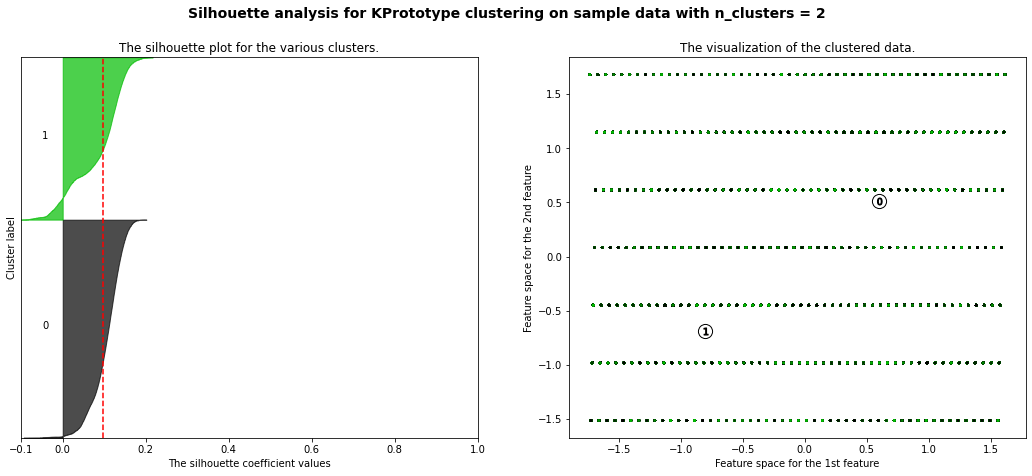

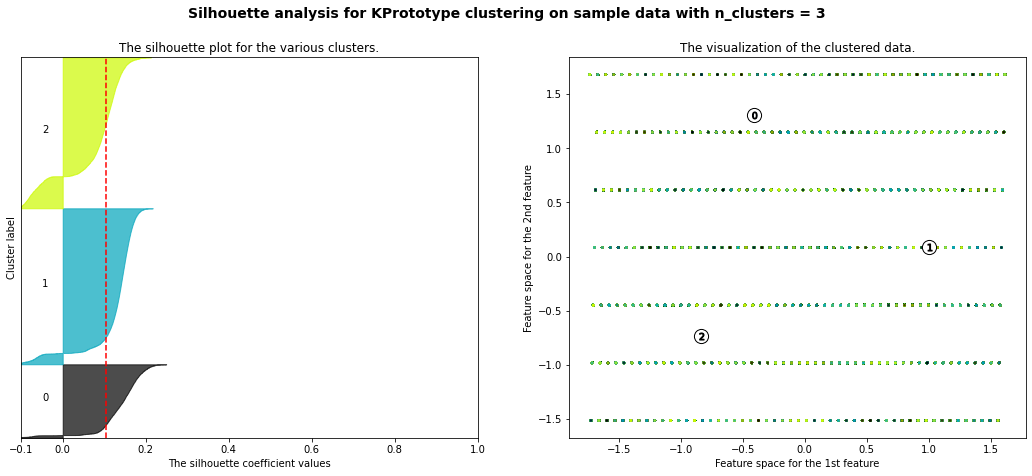

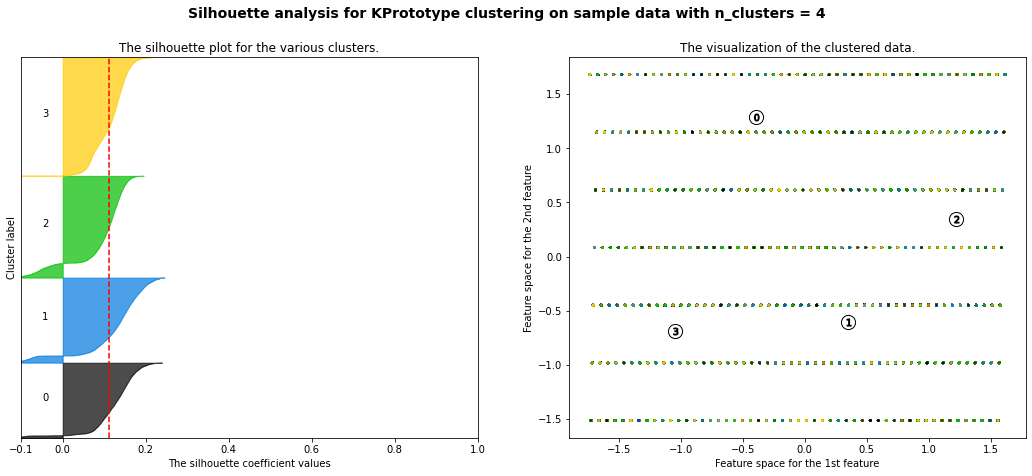

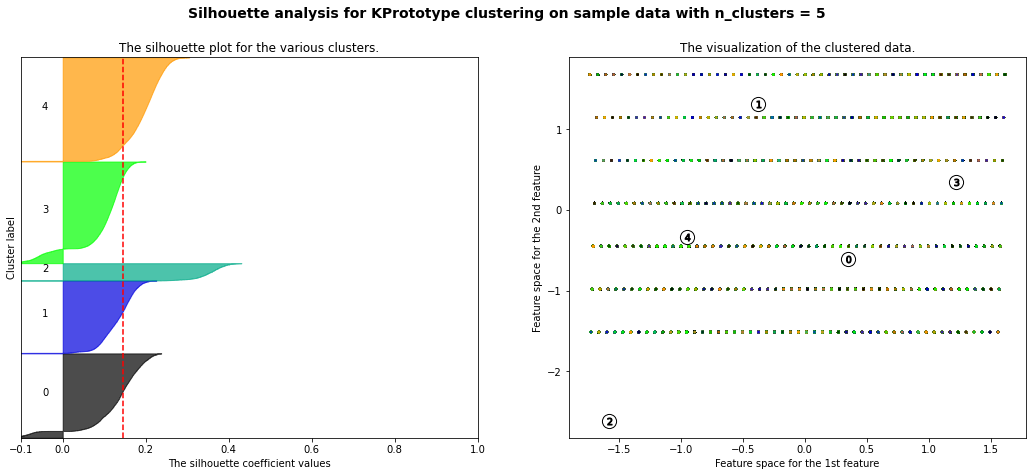

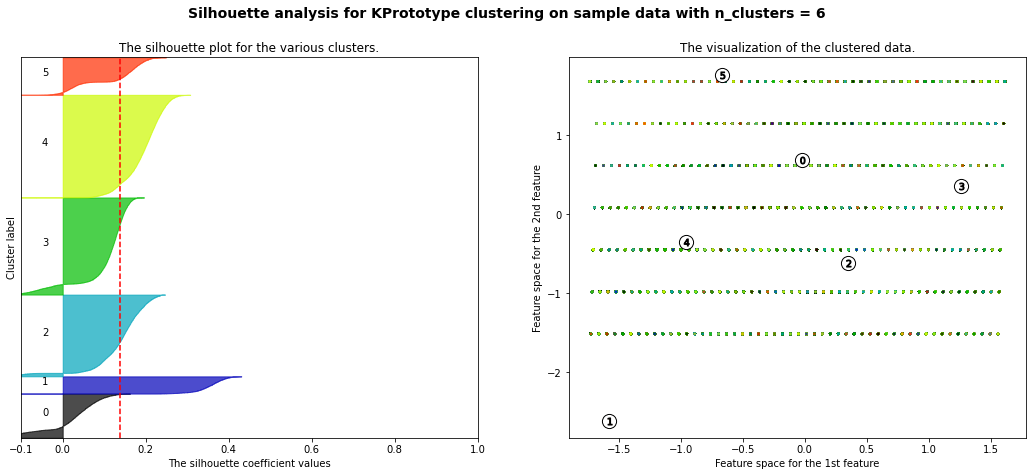

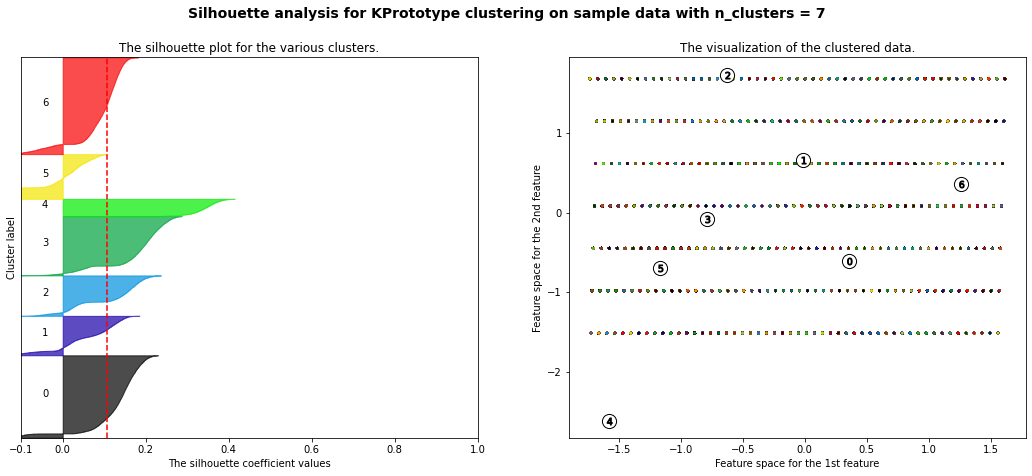

In [110]:
X = df_kproto_scaled.drop(columns='Clusters')

range_n_clusters = [2, 3, 4, 5, 6, 7] #TODO: USe the saved models parameters

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    #clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    clusterer = KPrototypes(n_jobs = -1, n_clusters = n_clusters, init = 'Huang', random_state = 0)
    cluster_labels = clusterer.fit_predict(dfMatrix, categorical = catColumnsPos)
    #cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    '''ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )'''
    ax2.scatter(
        X.iloc[:, 0], X.iloc[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centroids_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KPrototype clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

#### Conclusion: 

All k-prototype cluster numbers are suboptimal due to the presence of clusters with below-average silhouette scores; clusters aren't very dense and nicely separated
    
However, the winner is where n_clusters = 5 where the score is highest.

# Geographic Data Visualization of the Clusters on NYC
### (according to best model)

### PCA Engineered Features, Clustered on kMeans:

In [ ]:
# importing matplotlib modules
import matplotlib.image as mpimg
 
# Read Image
img = mpimg.imread('Images/Tableau/pca_feat_kmeans_clusters.png')
 
# Output Images
plt.imshow(img)

### Clustered on kModes:

In [ ]:
# Read Image
img = mpimg.imread('Images/Tableau/pca_feat_kmeans_clusters.png')
 
# Output Images
plt.imshow(img)

### Clustered on kPrototype:

In [ ]:
# Read Image
img = mpimg.imread('Images/Tableau/pca_feat_kmeans_clusters.png')
 
# Output Images
plt.imshow(img)

In [ ]:
### Clustered on kPrototype with Dimension Reduction (PCA):

In [ ]:
# Read Image
img = mpimg.imread('Images/Tableau/pca_feat_kmeans_clusters.png')
 
# Output Images
plt.imshow(img)

## K-Prototype Clustering (without dimension reduction) FOR PRE-COVID
#### Note: Using K-Prototype to mix the categorical columns with spatial data (coordinates) 

In [22]:
df_pre_covid = pd.read_csv("Data/Crime_data/pre_covid_crime.csv")
df_pre_covid.head()

ARREST_DATE  WeekDay  Month  Crime Severity  AGE_GROUP  PERP_SEX   Latitude  \
0  2019-03-01        4      3               1          1         1  40.757578   
1  2019-03-01        4      3               0          0         1  40.781417   
2  2019-03-01        4      3               0          0         1  40.575574   
3  2019-03-01        4      3               1          0         1  40.688378   
4  2019-03-01        4      3               0          2         1  40.814684   

   Longitude                       New Georeferenced Column  \
0 -73.989545   POINT (-73.98954452399994 40.75757811200003)   
1 -73.778168   POINT (-73.77816787699999 40.78141724100004)   
2 -73.981204  POINT (-73.98120362499998 40.575573630000065)   
3 -73.944912   POINT (-73.94491165999996 40.68837827800007)   
4 -73.891918   POINT (-73.89191764199995 40.81468425600008)   

   ARREST_BORO_Brooklyn  ARREST_BORO_Manhatten  ARREST_BORO_Queens  \
0                     0                      1                   0   
1                     0                      0                   1   
2                     1                      0                   0   
3                     1                      0                   0   
4                     0                      0                   0   

   ARREST_BORO_Staten Island  PERP_RACE_ASIAN / PACIFIC ISLANDER  \
0                          0                                   0   
1                          0                                   0   
2                          0                                   0   
3                          0                                   0   
4                          0                                   0   

   PERP_RACE_BLACK  PERP_RACE_BLACK HISPANIC  PERP_RACE_WHITE  \
0                1                         0                0   
1                0                         0                1   
2                1                         0                0   
3                1                         0                0   
4                0                         0                0   

   PERP_RACE_WHITE HISPANIC  
0                         0  
1                         0  
2                         0  
3                         0  
4                         1

In [23]:
#deepcopy the dataframe
df_pre_kproto = copy.deepcopy(df_pre_covid)

#drop spatial data (spatial data isnt categorical... boroughs are sufficient in this case)
df_pre_kproto = df_pre_kproto.drop(columns= 'New Georeferenced Column')

#convert the date strings to datetime objects (to be able to scale)
df_pre_kproto['ARREST_DATE'] = df_pre_kproto['ARREST_DATE'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d"))

#convert the datetime objects to timestamps (to be able to scale)
df_pre_kproto['ARREST_DATE'] = df_pre_kproto['ARREST_DATE'].apply(lambda x: datetime.datetime.timestamp(x))

df_pre_kproto

ARREST_DATE  WeekDay  Month  Crime Severity  AGE_GROUP  PERP_SEX  \
0       1.551416e+09        4      3               1          1         1   
1       1.551416e+09        4      3               0          0         1   
2       1.551416e+09        4      3               0          0         1   
3       1.551416e+09        4      3               1          0         1   
4       1.551416e+09        4      3               0          2         1   
...              ...      ...    ...             ...        ...       ...   
189303  1.582952e+09        5      2               2          0         0   
189304  1.582952e+09        5      2               1          0         1   
189305  1.582952e+09        5      2               2          1         1   
189306  1.582952e+09        5      2               0          1         1   
189307  1.582952e+09        5      2               1          0         1   

         Latitude  Longitude  ARREST_BORO_Brooklyn  ARREST_BORO_Manhatten  \
0       40.757578 -73.989545                     0                      1   
1       40.781417 -73.778168                     0                      0   
2       40.575574 -73.981204                     1                      0   
3       40.688378 -73.944912                     1                      0   
4       40.814684 -73.891918                     0                      0   
...           ...        ...                   ...                    ...   
189303  40.758570 -73.877386                     0                      0   
189304  40.817218 -73.953472                     0                      1   
189305  40.657675 -74.000924                     1                      0   
189306  40.641755 -73.999468                     1                      0   
189307  40.817218 -73.953472                     0                      1   

        ARREST_BORO_Queens  ARREST_BORO_Staten Island  \
0                        0                          0   
1                        1                          0   
2                        0                          0   
3                        0                          0   
4                        0                          0   
...                    ...                        ...   
189303                   1                          0   
189304                   0                          0   
189305                   0                          0   
189306                   0                          0   
189307                   0                          0   

        PERP_RACE_ASIAN / PACIFIC ISLANDER  PERP_RACE_BLACK  \
0                                        0                1   
1                                        0                0   
2                                        0                1   
3                                        0                1   
4                                        0                0   
...                                    ...              ...   
189303                                   0                0   
189304                                   0                0   
189305                                   0                0   
189306                                   0                0   
189307                                   0                0   

        PERP_RACE_BLACK HISPANIC  PERP_RACE_WHITE  PERP_RACE_WHITE HISPANIC  
0                              0                0                         0  
1                              0                1                         0  
2                              0                0                         0  
3                              0                0                         0  
4                              0                0                         1  
...                          ...              ...                       ...  
189303                         0                0                         1  
189304                         0                0                         1  
189305         

In [24]:
#Scaling/Normalizing the dataframe for the kmode
#scaler = MinMaxScaler()
scaler = StandardScaler()
df_pre_kproto_scaled=scaler.fit_transform(df_pre__kproto)
df_pre_kproto_scaled = pd.DataFrame(df_pre_kproto_scaled, columns = df_pre_kproto.columns)
df_pre_kproto_scaled

ARREST_DATE   WeekDay     Month  Crime Severity  AGE_GROUP  PERP_SEX  \
0         -1.637844  0.608881 -1.010602        0.181615   0.001827  0.473223   
1         -1.637844  0.608881 -1.010602       -1.031809  -1.521436  0.473223   
2         -1.637844  0.608881 -1.010602       -1.031809  -1.521436  0.473223   
3         -1.637844  0.608881 -1.010602        0.181615  -1.521436  0.473223   
4         -1.637844  0.608881 -1.010602       -1.031809   1.525089  0.473223   
...             ...       ...       ...             ...        ...       ...   
189303     1.820148  1.143647 -1.311706        1.395039  -1.521436 -2.113169   
189304     1.820148  1.143647 -1.311706        0.181615  -1.521436  0.473223   
189305     1.820148  1.143647 -1.311706        1.395039   0.001827  0.473223   
189306     1.820148  1.143647 -1.311706       -1.031809   0.001827  0.473223   
189307     1.820148  1.143647 -1.311706        0.181615  -1.521436  0.473223   

        Latitude  Longitude  ARREST_BORO_Brooklyn  ARREST_BORO_Manhatten  \
0       0.238374  -0.857605             -0.615117               1.748927   
1       0.528436   1.884100             -0.615117              -0.571779   
2      -1.976160  -0.749418              1.625706              -0.571779   
3      -0.603613  -0.278685              1.625706              -0.571779   
4       0.933211   0.408685             -0.615117              -0.571779   
...          ...        ...                   ...                    ...   
189303  0.250444   0.597170             -0.615117              -0.571779   
189304  0.964037  -0.389720             -0.615117               1.748927   
189305 -0.977198  -1.005206              1.625706              -0.571779   
189306 -1.170901  -0.986321              1.625706              -0.571779   
189307  0.964037  -0.389720             -0.615117               1.748927   

        ARREST_BORO_Queens  ARREST_BORO_Staten Island  \
0                -0.514795                  -0.209824   
1                 1.942522                  -0.209824   
2                -0.514795                  -0.209824   
3                -0.514795                  -0.209824   
4                -0.514795                  -0.209824   
...                    ...                        ...   
189303            1.942522                  -0.209824   
189304           -0.514795                  -0.209824   
189305           -0.514795                  -0.209824   
189306           -0.514795                  -0.209824   
189307           -0.514795                  -0.209824   

        PERP_RACE_ASIAN / PACIFIC ISLANDER  PERP_RACE_BLACK  \
0                                -0.244045         1.042419   
1                                -0.244045        -0.959308   
2                                -0.244045         1.042419   
3                                -0.244045         1.042419   
4                                -0.244045        -0.959308   
...                                    ...              ...   
189303                           -0.244045        -0.959308   
189304                           -0.244045        -0.959308   
189305                           -0.244045        -0.959308   
189306                           -0.244045        -0.959308   
189307                           -0.244045        -0.959308   

        PERP_RACE_BLACK HISPANIC  PERP_RACE_WHITE  PERP_RACE_WHITE HISPANIC  
0                       -0.30897        -0.369358                 -0.584410  
1                       -0.30897         2.707401                 -0.584410  
2                       -0.30897        -0.369358                 -0.584410  
3                       -0.30897        -0.369358                 -0.584410  
4                       -0.30897        -0.369358                  1.711128  
...                          ...              ...                       ...  
189303                  -0.30897        -0.369358                  1.711128  
189304                  -0.30897        -0.369358                  1

In [25]:
df_pre_kproto_scaled.dtypes

ARREST_DATE                           float64
WeekDay                               float64
Month                                 float64
Crime Severity                        float64
AGE_GROUP                             float64
PERP_SEX                              float64
Latitude                              float64
Longitude                             float64
ARREST_BORO_Brooklyn                  float64
ARREST_BORO_Manhatten                 float64
ARREST_BORO_Queens                    float64
ARREST_BORO_Staten Island             float64
PERP_RACE_ASIAN / PACIFIC ISLANDER    float64
PERP_RACE_BLACK                       float64
PERP_RACE_BLACK HISPANIC              float64
PERP_RACE_WHITE                       float64
PERP_RACE_WHITE HISPANIC              float64
dtype: object

In [26]:
# Get the position of categorical columns
catColumnsPos = [df_pre_kproto_scaled.columns.get_loc(col) for col in list(df_pre_kproto.select_dtypes('object').columns)]
print('Categorical columns           : {}'.format(list(df_pre_kproto_scaled.select_dtypes('object').columns)))
print('Categorical columns position  : {}'.format(catColumnsPos))

Categorical columns           : []
Categorical columns position  : []


In [27]:
col_names = list(['ARREST_DATE', 'WeekDay', 'Month', 'Crime Severity',
                    'AGE_GROUP', 'PERP_SEX', 'ARREST_BORO_Brooklyn', 'ARREST_BORO_Manhatten',
                    'ARREST_BORO_Queens', 'ARREST_BORO_Staten Island', 'PERP_RACE_ASIAN / PACIFIC ISLANDER',
                    'PERP_RACE_BLACK', 'PERP_RACE_BLACK HISPANIC', 'PERP_RACE_WHITE', 'PERP_RACE_WHITE HISPANIC'])

catColumnsPos = [df_pre_kproto_scaled.columns.get_loc(col) for col in col_names]
print('Categorical columns           : {}'.format(col_names))
print('Categorical columns position  : {}'.format(catColumnsPos))

Categorical columns           : ['ARREST_DATE', 'WeekDay', 'Month', 'Crime Severity', 'AGE_GROUP', 'PERP_SEX', 'ARREST_BORO_Brooklyn', 'ARREST_BORO_Manhatten', 'ARREST_BORO_Queens', 'ARREST_BORO_Staten Island', 'PERP_RACE_ASIAN / PACIFIC ISLANDER', 'PERP_RACE_BLACK', 'PERP_RACE_BLACK HISPANIC', 'PERP_RACE_WHITE', 'PERP_RACE_WHITE HISPANIC']
Categorical columns position  : [0, 1, 2, 3, 4, 5, 8, 9, 10, 11, 12, 13, 14, 15, 16]


In [28]:
# Convert dataframe to matrix ###NOTE: This might no longer be necessary in the kmodes version
df_pre_Matrix = df_pre_kproto_scaled.to_numpy()
df_pre_Matrix

array([[-1.63784397,  0.60888149, -1.01060179, ..., -0.30897034,
        -0.36935796, -0.58440979],
       [-1.63784397,  0.60888149, -1.01060179, ..., -0.30897034,
         2.70740069, -0.58440979],
       [-1.63784397,  0.60888149, -1.01060179, ..., -0.30897034,
        -0.36935796, -0.58440979],
       ...,
       [ 1.82014836,  1.14364749, -1.31170602, ..., -0.30897034,
        -0.36935796,  1.71112809],
       [ 1.82014836,  1.14364749, -1.31170602, ..., -0.30897034,
        -0.36935796,  1.71112809],
       [ 1.82014836,  1.14364749, -1.31170602, ..., -0.30897034,
        -0.36935796,  1.71112809]])

Note (init = 'Huang')

Selecting ‘Huang’ as the init, the model will select the first k distinct objects from the data set as initial k-modes and then assign the most frequent categories equally to the initial k-modes. 

The ‘Cao’ approach selects prototypes for each data object based on the density of the data point and the dissimilarity value.

In [30]:
# Choose optimal K using Elbow method
cost = []
for cluster in range(1, 10):
    try:
        kprototype_pre_ = KPrototypes(n_jobs = -1, n_clusters = cluster, init = 'Huang', random_state = 0)
        kprototype_pre_.fit_predict(df_pre_Matrix, categorical = catColumnsPos)
        cost.append(kprototype_pre_.cost_)
        print('Cluster initiation: {}'.format(cluster))
    except Exception as e:
        print(e)
        break# Converting the results into a dataframe and plotting them
cost

Cluster initiation: 1
Cluster initiation: 2
Cluster initiation: 3
Cluster initiation: 4
Cluster initiation: 5
Cluster initiation: 6
Cluster initiation: 7
Cluster initiation: 8
Cluster initiation: 9


[916729.9999998654,
 743645.7629936385,
 640120.0648845673,
 587121.052441049,
 539911.4694293224,
 523294.0756955354,
 506636.4569900943,
 493460.59891657,
 485289.23066750594]

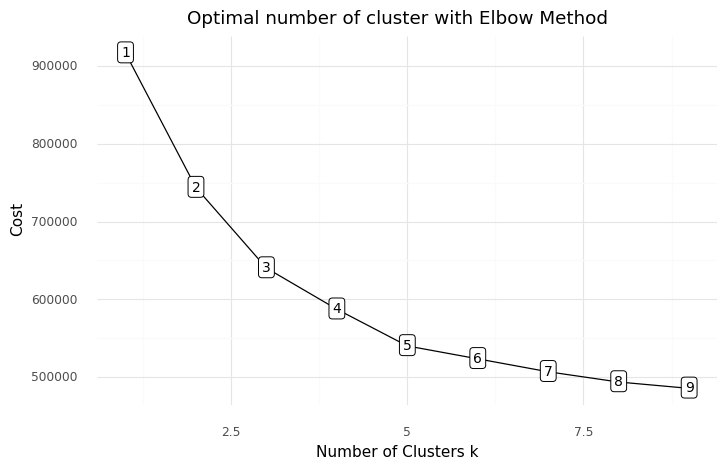

<ggplot: (8788041304426)>

In [31]:
df_pre__cost = pd.DataFrame({'Cluster':range(1, 10), 'Cost':cost})# Data viz, note: range (is the number of clusters)
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_pre__cost)+
    geom_line(aes(x = 'Cluster',
                  y = 'Cost'))+
    geom_point(aes(x = 'Cluster',
                   y = 'Cost'))+
    geom_label(aes(x = 'Cluster',
                   y = 'Cost',
                   label = 'Cluster'),
               size = 10,
               nudge_y = 1000) +
    labs(title = 'Optimal number of cluster with Elbow Method')+
    xlab('Number of Clusters k')+
    ylab('Cost')+
    theme_minimal()
)

#### Note: k= 4 (3 or 5)

In [45]:
# Fit the cluster
kprototype_pre_ = KPrototypes(n_jobs = -1, n_clusters = 5, init = 'Huang', random_state = 0)
kprototype_pre_.fit_predict(df_pre_Matrix, categorical = catColumnsPos)

array([4, 1, 3, ..., 3, 3, 2], dtype=uint16)

In [46]:
import pickle
#save the model to disk
kproto_pre_Model = '_pre_covid_kproto_5c_model.sav'
pickle.dump(kprototype_pre_, open(kproto_pre_Model, 'wb'))

#load the model from disk
#kprototype = pickle.load(open('finalized_model.sav', 'rb'))

In [47]:
# Cluster centroid
kprototype_pre_.cluster_centroids_

array([[-1.58537362e+00, -2.59186693e+00,  1.71593490e+00,
        -4.60650508e-01, -1.01060179e+00, -1.03180918e+00,
         1.82655021e-03,  4.73222830e-01, -6.15117327e-01,
        -5.71779183e-01, -5.14794585e-01,  4.76590936e+00,
        -2.44044514e-01, -9.59307583e-01, -3.08970343e-01,
        -3.69357962e-01, -5.84409786e-01],
       [-3.81383506e-01,  1.35992197e+00, -1.38244202e+00,
        -4.60650508e-01, -4.08393330e-01, -1.03180918e+00,
         1.82655021e-03,  4.73222830e-01, -6.15117327e-01,
        -5.71779183e-01,  1.94252237e+00, -2.09823546e-01,
        -2.44044514e-01, -9.59307583e-01, -3.08970343e-01,
        -3.69357962e-01, -5.84409786e-01],
       [ 1.22966263e+00,  3.40273217e-01, -1.05085372e+00,
        -4.60650508e-01,  1.93815132e-01,  1.81614927e-01,
         1.82655021e-03,  4.73222830e-01, -6.15117327e-01,
        -5.71779183e-01, -5.14794585e-01, -2.09823546e-01,
        -2.44044514e-01, -9.59307583e-01, -3.08970343e-01,
        -3.69357962e-01, -5.8

In [48]:
# Check the iteration of the clusters created
kprototype_pre_.n_iter_

6

In [49]:
# Check the cost of the clusters created
kprototype_pre_.cost_

539911.4694293224

In [75]:
df_pre_kproto['Cluster Labels'] = kprototype_pre_.labels_

In [77]:
df_pre_kproto.to_csv('pre_covid_kproto_5c_clusters', index=False)

In [63]:
# Add the cluster to the dataframe
df_pre_kproto_scaled['Cluster Labels'] = kprototype_pre_.labels_
df_pre_kproto_scaled['Segment'] = df_pre_kproto_scaled['Cluster Labels'].map({0:'First', 1:'Second', 2:'Third', 3:'Fourth', 4:'Fifth'})
# Order the cluster
df_pre_kproto_scaled['Segment'] = df_pre_kproto_scaled['Segment'].astype('category')
df_pre_kproto_scaled['Segment'] = df_pre_kproto_scaled['Segment'].cat.reorder_categories(['First','Second','Third','Fourth', 'Fifth'])
df_pre_kproto_scaled

ARREST_DATE   WeekDay     Month  Crime Severity  AGE_GROUP  PERP_SEX  \
0         -1.637844  0.608881 -1.010602        0.181615   0.001827  0.473223   
1         -1.637844  0.608881 -1.010602       -1.031809  -1.521436  0.473223   
2         -1.637844  0.608881 -1.010602       -1.031809  -1.521436  0.473223   
3         -1.637844  0.608881 -1.010602        0.181615  -1.521436  0.473223   
4         -1.637844  0.608881 -1.010602       -1.031809   1.525089  0.473223   
...             ...       ...       ...             ...        ...       ...   
189303     1.820148  1.143647 -1.311706        1.395039  -1.521436 -2.113169   
189304     1.820148  1.143647 -1.311706        0.181615  -1.521436  0.473223   
189305     1.820148  1.143647 -1.311706        1.395039   0.001827  0.473223   
189306     1.820148  1.143647 -1.311706       -1.031809   0.001827  0.473223   
189307     1.820148  1.143647 -1.311706        0.181615  -1.521436  0.473223   

        Latitude  Longitude  ARREST_BORO_Brooklyn  ARREST_BORO_Manhatten  \
0       0.238374  -0.857605             -0.615117               1.748927   
1       0.528436   1.884100             -0.615117              -0.571779   
2      -1.976160  -0.749418              1.625706              -0.571779   
3      -0.603613  -0.278685              1.625706              -0.571779   
4       0.933211   0.408685             -0.615117              -0.571779   
...          ...        ...                   ...                    ...   
189303  0.250444   0.597170             -0.615117              -0.571779   
189304  0.964037  -0.389720             -0.615117               1.748927   
189305 -0.977198  -1.005206              1.625706              -0.571779   
189306 -1.170901  -0.986321              1.625706              -0.571779   
189307  0.964037  -0.389720             -0.615117               1.748927   

        ARREST_BORO_Queens  ARREST_BORO_Staten Island  \
0                -0.514795                  -0.209824   
1                 1.942522                  -0.209824   
2                -0.514795                  -0.209824   
3                -0.514795                  -0.209824   
4                -0.514795                  -0.209824   
...                    ...                        ...   
189303            1.942522                  -0.209824   
189304           -0.514795                  -0.209824   
189305           -0.514795                  -0.209824   
189306           -0.514795                  -0.209824   
189307           -0.514795                  -0.209824   

        PERP_RACE_ASIAN / PACIFIC ISLANDER  PERP_RACE_BLACK  \
0                                -0.244045         1.042419   
1                                -0.244045        -0.959308   
2                                -0.244045         1.042419   
3                                -0.244045         1.042419   
4                                -0.244045        -0.959308   
...                                    ...              ...   
189303                           -0.244045        -0.959308   
189304                           -0.244045        -0.959308   
189305                           -0.244045        -0.959308   
189306                           -0.244045        -0.959308   
189307                           -0.244045        -0.959308   

        PERP_RACE_BLACK HISPANIC  PERP_RACE_WHITE  PERP_RACE_WHITE HISPANIC  \
0                       -0.30897        -0.369358                 -0.584410   
1                       -0.30897         2.707401                 -0.584410   
2                       -0.30897        -0.369358                 -0.584410   
3                       -0.30897        -0.369358                 -0.584410   
4                       -0.30897        -0.369358                  1.711128   
...                          ...              ...                       ...   
189303                  -0.30897        -0.369358                  1.711128   
189304                  -0.30897        -0.369358           

In [64]:
# Cluster interpretation , Note: numerical variables - avg & categorical - mode
#### Note: Can use other ways like: median, percentile, or value composition for categorical variables.
df_pre_kproto_scaled.rename(columns = {'Cluster Labels':'Total'}, inplace = True)
kproto_pre_covid_mean = df_pre_kproto_scaled.groupby('Segment').agg(
    {
        'Total':'count',
        'ARREST_DATE': lambda x: x.value_counts().index[0],
        'WeekDay': lambda x: x.value_counts().index[0],
        'Month': lambda x: x.value_counts().index[0],
        'Crime Severity': lambda x: x.value_counts().index[0],
        'AGE_GROUP': lambda x: x.value_counts().index[0],
        'PERP_SEX': lambda x: x.value_counts().index[0],
        'ARREST_BORO_Brooklyn': lambda x: x.value_counts().index[0],
        'ARREST_BORO_Manhatten': lambda x: x.value_counts().index[0],
        'ARREST_BORO_Queens': lambda x: x.value_counts().index[0],
        'ARREST_BORO_Staten Island': lambda x: x.value_counts().index[0],
        'PERP_RACE_ASIAN / PACIFIC ISLANDER': lambda x: x.value_counts().index[0],
        'PERP_RACE_BLACK': lambda x: x.value_counts().index[0],
        'PERP_RACE_BLACK HISPANIC': lambda x: x.value_counts().index[0],
        'PERP_RACE_WHITE': lambda x: x.value_counts().index[0],
        'PERP_RACE_WHITE HISPANIC': lambda x: x.value_counts().index[0],
        'Latitude': lambda x: stats.mode(round(x, 2)) ,
        'Longitude': lambda x: stats.mode(round(x, 2))
    }
).reset_index()

#displaying only the mode (not the count) for both lat and long
kproto_pre_covid_mean['Latitude'] = kproto_pre_covid_mean['Latitude'].apply( lambda x: x.mode.item())
kproto_pre_covid_mean['Longitude'] = kproto_pre_covid_mean['Longitude'].apply( lambda x: x.mode.item())
kproto_pre_covid_mean

Segment  Total  ARREST_DATE   WeekDay     Month  Crime Severity  AGE_GROUP  \
0   First   7985     1.715935 -0.460651 -1.010602       -1.031809   0.001827   
1  Second  35389    -1.382442 -0.460651 -0.408393       -1.031809   0.001827   
2   Third  50654    -1.050854 -0.460651  0.193815        0.181615   0.001827   
3  Fourth  51806    -1.543499 -0.460651 -1.010602       -1.031809   0.001827   
4   Fifth  43474    -1.117171  0.074115 -0.709498       -1.031809   0.001827   

   PERP_SEX  ARREST_BORO_Brooklyn  ARREST_BORO_Manhatten  ARREST_BORO_Queens  \
0  0.473223             -0.615117              -0.571779           -0.514795   
1  0.473223             -0.615117              -0.571779            1.942522   
2  0.473223             -0.615117              -0.571779           -0.514795   
3  0.473223              1.625706              -0.571779           -0.514795   
4  0.473223             -0.615117               1.748927           -0.514795   

   ARREST_BORO_Staten Island  PERP_RACE_ASIAN / PACIFIC ISLANDER  \
0                   4.765909                           -0.244045   
1                  -0.209824                           -0.244045   
2                  -0.209824                           -0.244045   
3                  -0.209824                           -0.244045   
4                  -0.209824                           -0.244045   

   PERP_RACE_BLACK  PERP_RACE_BLACK HISPANIC  PERP_RACE_WHITE  \
0        -0.959308                  -0.30897        -0.369358   
1        -0.959308                  -0.30897        -0.369358   
2        -0.959308                  -0.30897        -0.369358   
3         1.042419                  -0.30897        -0.369358   
4         1.042419                  -0.30897        -0.369358   

   PERP_RACE_WHITE HISPANIC  Latitude  Longitude  
0                  -0.58441     -1.13      -1.99  
1                  -0.58441     -0.71       1.91  
2                  -0.58441      0.95       0.30  
3                  -0.58441     -0.81       0.54  
4                  -0.58441     -0.27      -1.01

In [65]:
#PLOT RADAR CHART - to get an overview of the clusters on the features

categories = list(kproto_pre_covid_mean.drop(columns=['Segment','Total'])) #list of all column names
categories

['ARREST_DATE',
 'WeekDay',
 'Month',
 'Crime Severity',
 'AGE_GROUP',
 'PERP_SEX',
 'ARREST_BORO_Brooklyn',
 'ARREST_BORO_Manhatten',
 'ARREST_BORO_Queens',
 'ARREST_BORO_Staten Island',
 'PERP_RACE_ASIAN / PACIFIC ISLANDER',
 'PERP_RACE_BLACK',
 'PERP_RACE_BLACK HISPANIC',
 'PERP_RACE_WHITE',
 'PERP_RACE_WHITE HISPANIC',
 'Latitude',
 'Longitude']

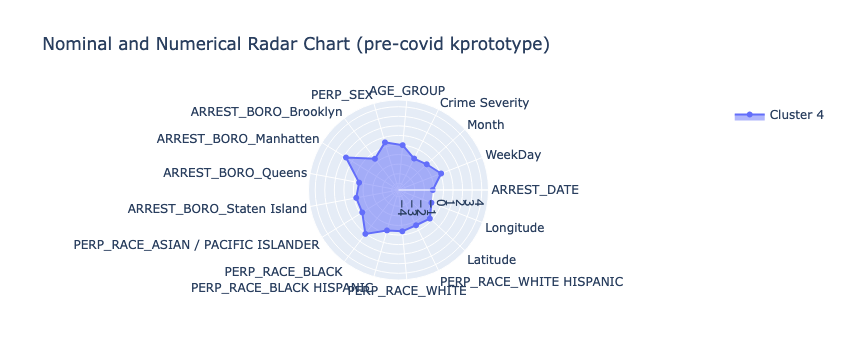

In [73]:
fig = go.Figure()

#TODO: inner for loop so that you can reuse these for any number of clusters
c = kproto_pre_covid_mean.drop(columns=['Segment','Total']) #for easy labels
for i in range(0, len(c)): # , starts at -1 for DBSCAN who identifies outliers and starts at 0 with kmean/kmode

  fig.add_trace(go.Scatterpolar(
      r=[c.loc[i][0], c.loc[i][1], c.loc[i][2], c.loc[i][3], c.loc[i][4], c.loc[i][5], c.loc[i][6], c.loc[i][7], c.loc[i][8], c.loc[i][9], c.loc[i][10], c.loc[i][11], c.loc[i][12], c.loc[i][13], c.loc[i][14], c.loc[i][15], c.loc[i][16]],
      theta=categories,
      fill='toself',
      name= f'Cluster {i}'
  ))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[-4.7, 4.7]
    )),
  showlegend=True,
  title='Nominal and Numerical Radar Chart (pre-covid kprototype)'
)

fig.show()

### CONCLUSION
The best cluster for pre-covid (without dimension reduction) is:
        - with k-prototype with 5 clusters. 

# MISC CODES

In [ ]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = km_from_pca_clusters_mean['PCA1']
y = km_from_pca_clusters_mean['PCA2']
z = km_from_pca_clusters_mean['PCA3']
c = km_from_pca_clusters_mean.index
img = ax.scatter(x, y, z, c=c, cmap='YlOrRd', alpha=1)
plt.show()

In [ ]:
#TEST: THIS CODE IS FOR DOING PCA AFTER CLUSTERING (for better plotting) 
k = ...    # how many clusters you want

# Fit k-means to the high-dimensional data, getting the cluster assignments (y) and centroids
kmeans = KMeans(k=k).fit(X)    # fit to your datapoints
y = kmeans.predict(X)          # get cluster assignments for your datapoints
centroids = kmeans.cluster_centers_

# Reduce dimensionality of the data and centroids for visualization purposes
pca = PCA(n_components=3).fit(X)
X_reduced = pca.transform(X)
centroids_reduced = pca.transform(centroids)

# Plot the data and colour code according to cluster assignments (y)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y, label='data')

# Plot the centroids using a different marker (triangles) and colour code according to cluster index
ax.scatter(centroids_reduced[:, 0], centroids_reduced[:, 1], centroids_reduced[:, 2], c=list(range(k)), label='centroids', marker='^')

# Show the legend
ax.legend()

# Show the plot
plt.plot()


In [ ]:
#TEST: THIS CODE IS FOR IF PCA WAS ALREADY APPLIED BEFORE... 

k = ...    # how many clusters you want

kmeans = KMeans(k=k).fit(dfkproto_reduced_dim)    # fit to your datapoints
y = kmeans.predict(dfkproto_reduced_dim)                  # get cluster assignments for your datapoints
centroids_reduced = kmeans.clustercenters

# Plot the data and colour code according to cluster assignments (y)
ax.scatter(dfkproto_reduced_dim[:, 0], dfkproto_reduced_dim[:, 1], dfkproto_reduced_dim[:, 2], c=y, label='data')

# Plot the centroids using a different marker (triangles) and colour code according to cluster index
ax.scatter(centroids_reduced[:, 0], centroids_reduced[:, 1], centroids_reduced[:, 2], c=list(range(k)), label='centroids', marker='^')

# Show the legend
ax.legend()

# Show the plot
plt.plot() 


In [ ]:
#import pickle
#save the model to disk
#kprotoModel = 'covid_kproto_5c_model.sav'
#pickle.dump(kprototype, open(kprotoModel, 'wb'))

#load the model from disk
kprototype_01 = pickle.load(open('Models/covid_kproto_5c_model.sav', 'rb'))

In [ ]:
dfMatrix

In [ ]:
df_kproto_scaled

In [ ]:
kprototype_01.predict(dfMatrix, categorical = catColumnsPos)

In [ ]:
# Add the cluster to the dataframe
df_kproto['Clusters'] = kprototype_01.labels_

In [ ]:
df_kproto

In [ ]:
df_kproto.to_csv('covid_kproto_5c_clusters.csv',index=False)

In [ ]:
#import pickle
#save the model to disk
#kprotoModel = 'covid_kproto_5c_model.sav'
#pickle.dump(kprototype, open(kprotoModel, 'wb'))

#load the model from disk
kmodes_01 = pickle.load(open('Models/covid_kmodes_2c_model.sav', 'rb'))

In [ ]:
df_kmodes

In [ ]:
kmodes_01.predict(df_kmodes)

In [ ]:
# Add the cluster to the dataframe
df_kproto['Clusters'] = kmodes_01.labels_

In [ ]:
df_kproto

In [ ]:
df_kproto.to_csv('covid_kmodes_clusters.csv',index=False)